In [201]:
import pandas as pd
import numpy as np
import math
from lineardatamodels import *
from lineartoydata import *
from lineardatatools import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Completely linear-gaussian data experiments
Here t and y are normally distributed, where the distribution is defined by structural parameters as in a SCM.

## Perfectly tailored model experiment
This model has all the conditional distributions as simple linear regressions with just as many parameters as the SCM for the decoder, and the encoder is linear regression on X,t and y as well, since that should be enough capacity for this linear-gaussian case. (conditional distributions of MV Gaussians are Gaussians)

In [202]:
"""Let's define the model here"""
c_x = np.array([1,2])
s_x = np.array([0.5,0.7])
c_t = np.array([0.5])
s_t = np.array([1])
c_yz = np.array([0.6])
c_yt = np.array([1])
s_y = np.array([1])

In [203]:
"""define all kinds of other things"""
datasizes = [500,1000,2000,3000,4000,5000]
datasize_times = 10
num_epochs = [300,300,250,250,150,150]
lr_start = 0.05
lr_end = 0.001
input_dim = 2
z_dim = 1
folder = "linear_data_1"
name = "perfectlinear"
BATCH_SIZE = 500
binary_t_y = False
p_y_zt_nn = False
q_z_xty_nn = False
dataparameters = [c_x, c_t, c_yz, c_yt, s_x, s_t, s_y]#Be careful that these are the correct way around
track_function = lambda model: model.decoder.y_nn.weight
true_value = c_yt
device = "cpu"

In [191]:
"""Run the training of the model. Skip this cell if you just want to reload the data."""
dfs, models = run_model_for_data_sets(datasizes,datasize_times,num_epochs,lr_start,lr_end,input_dim,z_dim,
                       folder,name,BATCH_SIZE,binary_t_y,p_y_zt_nn,q_z_xty_nn,
                        linear_data_df, dataparameters, track_function, true_value, device)

Creation of the directory data/linear_data_1/ failed. Trying to empty the same folder.
Training data size 500, run 1
Estimated causal effect: Parameter containing:
tensor([[-0.5033,  1.0263]], requires_grad=True) true value: [1]
Training data size 500, run 2
Estimated causal effect: Parameter containing:
tensor([[-0.4570,  1.0213]], requires_grad=True) true value: [1]
Training data size 500, run 3
Estimated causal effect: Parameter containing:
tensor([[0.4591, 1.0268]], requires_grad=True) true value: [1]
Training data size 500, run 4
Estimated causal effect: Parameter containing:
tensor([[-0.4874,  1.0516]], requires_grad=True) true value: [1]
Training data size 500, run 5
Estimated causal effect: Parameter containing:
tensor([[-0.4645,  1.0462]], requires_grad=True) true value: [1]
Training data size 500, run 6
Estimated causal effect: Parameter containing:
tensor([[0.4948, 0.9795]], requires_grad=True) true value: [1]
Training data size 500, run 7
Estimated causal effect: Parameter 

Estimated causal effect: Parameter containing:
tensor([[0.5928, 1.0236]], requires_grad=True) true value: [1]
Training data size 5000, run 9
Estimated causal effect: Parameter containing:
tensor([[0.6150, 1.0034]], requires_grad=True) true value: [1]
Training data size 5000, run 10
Estimated causal effect: Parameter containing:
tensor([[0.5951, 1.0003]], requires_grad=True) true value: [1]


In [204]:
"""Load the generated data"""
dfs, models = load_dfs_models(folder, name,
                   input_dim=input_dim, z_dim=1, device=device, binary_t_y=binary_t_y,
                  p_y_zt_nn=p_y_zt_nn, q_z_xty_nn=q_z_xty_nn)
datasizes = sorted(list(models.keys()))
datasize_times = max(list(models[next(iter(models))].keys()))+1

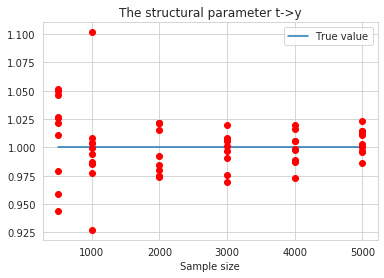

In [205]:
"""Plot results"""
plt.figure()
plt.plot([datasizes[0], datasizes[-1]], 2*[c_yt])
plt.title("The structural parameter t->y")
plt.xlabel("Sample size")
plt.legend(["True value"])
for datasize in datasizes:
    for i in range(datasize_times):
        plt.plot(datasize, models[datasize][i].decoder.y_nn.weight[0,1].detach().numpy(),'ro',)

In [194]:
avg_causal_dists = {}
for datasize in datasizes:
    avg_causal_dists[datasize] = {}
    for i in range(datasize_times):
        print("{},{}".format(datasize,i))
        model = models[datasize][i]
        avg_causal_dists[datasize][i],_,_,_,_,_ = avg_causal_L1_dist(model=model, c_yt=c_yt, c_yz=c_yz, s_y=s_y, c_t=c_t, s_t=s_t, c_x=c_x, p_y_zt_nn=False)

500,0
500,1
500,2
500,3
500,4
500,5
500,6
500,7
500,8
500,9
1000,0
1000,1
1000,2
1000,3
1000,4
1000,5
1000,6
1000,7
1000,8
1000,9
2000,0
2000,1
2000,2
2000,3
2000,4
2000,5
2000,6
2000,7
2000,8
2000,9
3000,0
3000,1
3000,2
3000,3
3000,4
3000,5
3000,6
3000,7
3000,8
3000,9
4000,0
4000,1
4000,2
4000,3
4000,4
4000,5
4000,6
4000,7
4000,8
4000,9
5000,0
5000,1
5000,2
5000,3
5000,4
5000,5
5000,6
5000,7
5000,8
5000,9


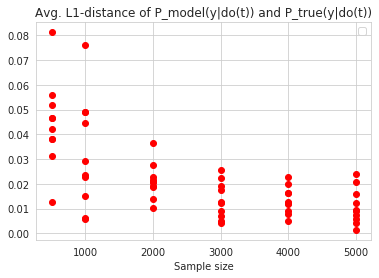

In [195]:
"""Plot results"""
plt.figure()
plt.xlabel("Sample size")
plt.legend(["True value"])
plt.title("Avg. L1-distance of P_model(y|do(t)) and P_true(y|do(t))")
for datasize in datasizes:
    for i in range(datasize_times):
        plt.plot(datasize, avg_causal_dists[datasize][i],'ro',)

Text(0.5, 0, 'y')

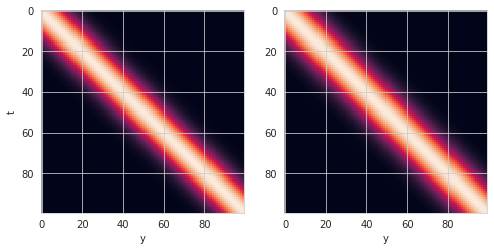

In [197]:
model = models[500][6]
avg_causal_dist, py_dot_model, py_dot_true, y_range, t_range, pt_true = avg_causal_L1_dist(model=model, c_yt=c_yt, c_yz=c_yz, s_y=s_y, c_t=c_t, s_t=s_t, c_x=c_x, p_y_zt_nn=False)

fig, axes = plt.subplots(1,2, figsize=(8,4))
axes[0].imshow(py_dot_model)
axes[1].imshow(py_dot_true)
axes[0].set_xlabel("y")
axes[0].set_ylabel("t")
axes[1].set_xlabel("y")

## p(y|z,t) is a neural network
In this case we don't get a structural parameter from the model to compare to the value from the data generating process. $P(y|do(t)) = \int P(y|z,t)P(z) dz$ is the causal effect. Would $\int\int|\int P(y|z,t)P(z)dz - P_{true}(y|do(t))|dyP(t)dt = \int |P(y|do(t),P_{true}(y|do(t))|_{L_1} P(t) dt$ be an interesting thing to look at? 

$\frac{d}{dy}E(y|do(t))$ is the structural parameter. Maybe we could also see the average deviation of this thing from the true parameter, but maybe doesn't make much sense.

In [280]:
"""Let's define the model here"""
c_x = np.array([1,2])
s_x = np.array([0.5,0.7])
c_t = np.array([0.5])
s_t = np.array([1])
c_yz = np.array([0.6])
c_yt = np.array([1])
s_y = np.array([1])

In [281]:
"""define all kinds of other things"""
datasizes = [500,1000,2000,3000,4000,5000]
datasize_times = 10
num_epochs = [500,300,200,150,150,150]
lr_start = [0.05,0.05,0.05,0.05,0.05,0.05]
lr_end = [0.001,0.001,0.001,0.001,0.001,0.001]
input_dim = 2
z_dim = 1
folder = "linear_data_py_zt_nn"
name = "linear_py_zt_nn"
BATCH_SIZE = 500
binary_t_y = False
p_y_zt_nn = True
q_z_xty_nn = False
dataparameters = [c_x, c_t, c_yz, c_yt, s_x, s_t, s_y]#Be careful that these are the correct way around
track_function = lambda model: model.decoder.y_nn.weight
true_value = c_yt
device = "cpu"

In [282]:
"""Run the training of the model. Skip this cell if you just want to reload the data."""
dfs, models = run_model_for_data_sets(datasizes,datasize_times,num_epochs,lr_start,lr_end,input_dim,z_dim,
                       folder,name,BATCH_SIZE,binary_t_y,p_y_zt_nn,q_z_xty_nn,
                        linear_data_df, dataparameters, track_function, true_value, device)

Creation of the directory data/linear_data_py_zt_nn/ failed. Trying to empty the same folder.
Training data size 500, run 1
Estimated causal effect: Parameter containing:
tensor([[ 0.4241, -0.3812]], requires_grad=True) true value: [1]
Training data size 500, run 2
Estimated causal effect: Parameter containing:
tensor([[-0.3678, -0.5898]], requires_grad=True) true value: [1]
Training data size 500, run 3
Estimated causal effect: Parameter containing:
tensor([[ 0.5737, -0.1259]], requires_grad=True) true value: [1]
Training data size 500, run 4
Estimated causal effect: Parameter containing:
tensor([[-0.6343,  0.2150]], requires_grad=True) true value: [1]
Training data size 500, run 5
Estimated causal effect: Parameter containing:
tensor([[-0.2275, -0.2758]], requires_grad=True) true value: [1]
Training data size 500, run 6
Estimated causal effect: Parameter containing:
tensor([[0.4851, 0.3124]], requires_grad=True) true value: [1]
Training data size 500, run 7
Estimated causal effect: P

Estimated causal effect: Parameter containing:
tensor([[0.5080, 0.4816]], requires_grad=True) true value: [1]
Training data size 5000, run 9
Estimated causal effect: Parameter containing:
tensor([[-0.5865, -0.5379]], requires_grad=True) true value: [1]
Training data size 5000, run 10
Estimated causal effect: Parameter containing:
tensor([[-0.2814, -0.1145]], requires_grad=True) true value: [1]


In [222]:
"""Load the generated data"""
dfs, models = load_dfs_models(folder, name,
                   input_dim=input_dim, z_dim=1, device=device, binary_t_y=binary_t_y,
                  p_y_zt_nn=p_y_zt_nn, q_z_xty_nn=q_z_xty_nn)
datasizes = sorted(list(models.keys()))
datasize_times = max(list(models[next(iter(models))].keys()))+1

In [223]:
avg_causal_dists = {}
for datasize in datasizes:
    avg_causal_dists[datasize] = {}
    for i in range(datasize_times):
        print("{},{}".format(datasize,i))
        model = models[datasize][i]
        avg_causal_dists[datasize][i],_,_,_,_,_ = avg_causal_L1_dist(model=model, c_yt=c_yt, c_yz=c_yz, s_y=s_y, 
                                                                   c_t=c_t, s_t=s_t, c_x=c_x, p_y_zt_nn=p_y_zt_nn,
                                                                  n=100)

500,0
500,1
500,2
500,3
500,4
500,5
500,6
500,7
500,8
500,9
1000,0
1000,1
1000,2
1000,3
1000,4
1000,5
1000,6
1000,7
1000,8
1000,9
2000,0
2000,1
2000,2
2000,3
2000,4
2000,5
2000,6
2000,7
2000,8
2000,9
3000,0
3000,1
3000,2
3000,3
3000,4
3000,5
3000,6
3000,7
3000,8
3000,9
4000,0
4000,1
4000,2
4000,3
4000,4
4000,5
4000,6
4000,7
4000,8
4000,9


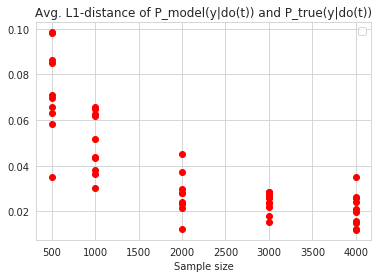

In [224]:
"""Plot causal distance results"""
plt.figure()
plt.xlabel("Sample size")
plt.legend(["True value"])
plt.title("Avg. L1-distance of P_model(y|do(t)) and P_true(y|do(t))")
for datasize in datasizes:
    for i in range(datasize_times):
        plt.plot(datasize, avg_causal_dists[datasize][i],'ro',)

Text(0.5, 1.0, 'True P(y|do(t))')

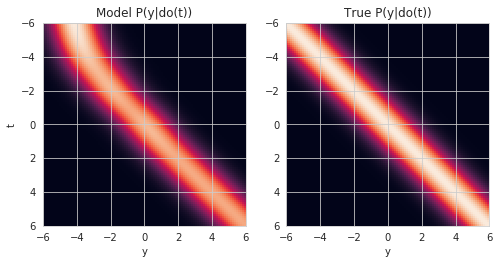

In [225]:
model = models[1000][1]
avg_causal_dist, py_dot_model, py_dot_true, y_range, t_range, pt_true = avg_causal_L1_dist(model=model, c_yt=c_yt, c_yz=c_yz, s_y=s_y, c_t=c_t, s_t=s_t, c_x=c_x, p_y_zt_nn=True)

fig, axes = plt.subplots(1,2, figsize=(8,4))
axes[0].imshow(py_dot_model, extent=(y_range[0], y_range[-1], t_range[-1],t_range[0]))
axes[1].imshow(py_dot_true, extent=(y_range[0], y_range[-1], t_range[-1],t_range[0]))
axes[0].set_xlabel("y")
axes[0].set_ylabel("t")
axes[1].set_xlabel("y")
axes[0].set_title("Model P(y|do(t))")
axes[1].set_title("True P(y|do(t))")

## z_dim = 2

In [238]:
"""Let's define the model here"""
c_x = np.array([1,2])
s_x = np.array([0.5,0.7])
c_t = np.array([0.5])
s_t = np.array([1])
c_yz = np.array([0.6])
c_yt = np.array([1])
s_y = np.array([1])

In [239]:
"""define all kinds of other things"""
datasizes = [500,1000,2000,3000,4000,5000]
datasize_times = 10
num_epochs = [450,250,250,200,200,200]#Should be about enough to train the 100 case with these parameters as well
lr_start = [0.05,0.05,0.05,0.05,0.05,0.05]
lr_end = [0.001,0.001,0.001,0.001,0.001,0.001]
input_dim = 2
z_dim = 2
folder = "linear_data_zdim_2"
name = "linear_zdim_2"
BATCH_SIZE = 500
binary_t_y = False
p_y_zt_nn = False
q_z_xty_nn = False
dataparameters = [c_x, c_t, c_yz, c_yt, s_x, s_t, s_y]#Be careful that these are the correct way around
track_function = lambda model: model.decoder.y_nn.weight
true_value = c_yt
device = "cpu"

In [240]:
"""Run the training of the model. Skip this cell if you just want to reload the data."""
dfs, models = run_model_for_data_sets(datasizes,datasize_times,num_epochs,lr_start,lr_end,input_dim,z_dim,
                       folder,name,BATCH_SIZE,binary_t_y,p_y_zt_nn,q_z_xty_nn,
                        linear_data_df, dataparameters, track_function, true_value, device)

Creation of the directory data/linear_data_zdim_2/ failed. Trying to empty the same folder.
Training data size 500, run 1
Estimated causal effect: Parameter containing:
tensor([[0.5868, 0.1288, 0.9671]], requires_grad=True) true value: [1]
Training data size 500, run 2
Estimated causal effect: Parameter containing:
tensor([[ 0.5526, -0.0365,  0.8906]], requires_grad=True) true value: [1]
Training data size 500, run 3
Estimated causal effect: Parameter containing:
tensor([[ 0.5241, -0.0814,  1.0784]], requires_grad=True) true value: [1]
Training data size 500, run 4
Estimated causal effect: Parameter containing:
tensor([[-0.6327, -0.0242,  1.0484]], requires_grad=True) true value: [1]
Training data size 500, run 5
Estimated causal effect: Parameter containing:
tensor([[-0.5607,  0.0686,  1.0704]], requires_grad=True) true value: [1]
Training data size 500, run 6
Estimated causal effect: Parameter containing:
tensor([[-0.5811,  0.0078,  0.9552]], requires_grad=True) true value: [1]
Train

Estimated causal effect: Parameter containing:
tensor([[-0.1130, -0.6297,  0.9410]], requires_grad=True) true value: [1]
Training data size 5000, run 6
Estimated causal effect: Parameter containing:
tensor([[-0.6180,  0.0013,  1.0045]], requires_grad=True) true value: [1]
Training data size 5000, run 7
Estimated causal effect: Parameter containing:
tensor([[ 0.6394, -0.2778,  0.9380]], requires_grad=True) true value: [1]
Training data size 5000, run 8
Estimated causal effect: Parameter containing:
tensor([[-0.0033, -0.5888,  1.0072]], requires_grad=True) true value: [1]
Training data size 5000, run 9
Estimated causal effect: Parameter containing:
tensor([[-0.0376, -0.6453,  0.9725]], requires_grad=True) true value: [1]
Training data size 5000, run 10
Estimated causal effect: Parameter containing:
tensor([[ 0.0215, -0.6071,  0.9862]], requires_grad=True) true value: [1]


In [241]:
"""Load the generated data"""
dfs, models = load_dfs_models(folder, name,
                   input_dim=input_dim, z_dim=z_dim, device=device, binary_t_y=binary_t_y,
                  p_y_zt_nn=p_y_zt_nn, q_z_xty_nn=q_z_xty_nn)
datasizes = sorted(list(models.keys()))
datasize_times = max(list(models[next(iter(models))].keys()))+1

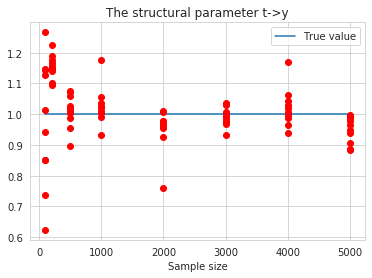

In [180]:
"""Plot results"""
plt.figure()
plt.plot([datasizes[0], datasizes[-1]], 2*[c_yt])
plt.title("The structural parameter t->y")
plt.xlabel("Sample size")
plt.legend(["True value"])
for datasize in datasizes:
    for i in range(datasize_times):
        plt.plot(datasize, models[datasize][i].decoder.y_nn.weight[0,2].detach().numpy(),'ro',)

In [24]:
avg_causal_dists = {}
for datasize in datasizes:
    avg_causal_dists[datasize] = {}
    for i in range(datasize_times):
        print("{},{}".format(datasize,i))
        model = models[datasize][i]
        avg_causal_dists[datasize][i],_,_,_,_,_ = avg_causal_L1_dist_general(model=model, c_yt=c_yt, c_yz=c_yz, s_y=s_y, 
                                                                   c_t=c_t, s_t=s_t, c_x=c_x, p_y_zt_nn=p_y_zt_nn,
                                                                  n=50,z_dim=2)

100,0
100,1
100,2
100,3
100,4
100,5
100,6
100,7
100,8
100,9
200,0
200,1
200,2
200,3
200,4
200,5
200,6
200,7
200,8
200,9
500,0
500,1
500,2
500,3
500,4
500,5
500,6
500,7
500,8
500,9
1000,0
1000,1
1000,2
1000,3
1000,4
1000,5
1000,6
1000,7
1000,8
1000,9
2000,0
2000,1
2000,2
2000,3
2000,4
2000,5
2000,6
2000,7
2000,8
2000,9
5000,0
5000,1
5000,2
5000,3
5000,4
5000,5
5000,6
5000,7
5000,8
5000,9


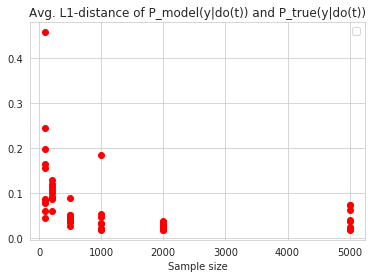

In [25]:
"""Plot causal distance results"""
plt.figure()
plt.xlabel("Sample size")
plt.legend(["True value"])
plt.title("Avg. L1-distance of P_model(y|do(t)) and P_true(y|do(t))")
for datasize in datasizes:
    for i in range(datasize_times):
        plt.plot(datasize, avg_causal_dists[datasize][i],'ro',)

Text(0.5, 1.0, 'P(t)')

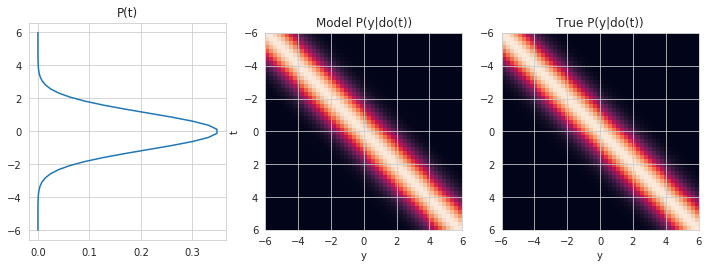

In [83]:
model = models[5000][9]
avg_causal_dist, py_dot_model, py_dot_true, y_range, t_range, pt_true = avg_causal_L1_dist_general(model=model, n=50, c_yt=c_yt, c_yz=c_yz, s_y=s_y, c_t=c_t, s_t=s_t, c_x=c_x, p_y_zt_nn=p_y_zt_nn, z_dim=z_dim)

fig, axes = plt.subplots(1,3, figsize=(12,4))
axes[1].imshow(py_dot_model, extent=(y_range[0], y_range[-1], t_range[-1],t_range[0]))
axes[2].imshow(py_dot_true, extent=(y_range[0], y_range[-1], t_range[-1],t_range[0]))
axes[1].set_xlabel("y")
axes[1].set_ylabel("t")
axes[2].set_xlabel("y")
axes[1].set_title("Model P(y|do(t))")
axes[2].set_title("True P(y|do(t))")
axes[0].plot(pt_true,t_range)
axes[0].set_title("P(t)")

## q(z|x,t,y) is a neural network

In [271]:
"""Let's define the model here"""
c_x = np.array([1,2])
s_x = np.array([0.5,0.7])
c_t = np.array([0.5])
s_t = np.array([1])
c_yz = np.array([0.6])
c_yt = np.array([1])
s_y = np.array([1])

In [272]:
"""define all kinds of other things"""
datasizes = [500,1000,2000,3000,4000,5000]
datasize_times = 10
num_epochs = [500,300,200,150,150,150]#Should be about enough to train the 100 case with these parameters as well
lr_start = [0.05,0.05,0.05,0.05,0.05,0.05]
lr_end = [0.001,0.001,0.001,0.001,0.001,0.001]
input_dim = 2
z_dim = 1
folder = "linear_data_qz_xty_nn"
name = "linear_qz_xty_nn"
BATCH_SIZE = 500
binary_t_y = False
p_y_zt_nn = False
q_z_xty_nn = True
dataparameters = [c_x, c_t, c_yz, c_yt, s_x, s_t, s_y]#Be careful that these are the correct way around
track_function = lambda model: model.decoder.y_nn.weight
true_value = c_yt
device = "cpu"

In [273]:
"""Run the training of the model. Skip this cell if you just want to reload the data."""
dfs, models = run_model_for_data_sets(datasizes,datasize_times,num_epochs,lr_start,lr_end,input_dim,z_dim,
                       folder,name,BATCH_SIZE,binary_t_y,p_y_zt_nn,q_z_xty_nn,
                        linear_data_df, dataparameters, track_function, true_value, device)

Creation of the directory data/linear_data_qz_xty_nn/ failed. Trying to empty the same folder.
Training data size 500, run 1
Estimated causal effect: Parameter containing:
tensor([[0.5800, 1.0473]], requires_grad=True) true value: [1]
Training data size 500, run 2
Estimated causal effect: Parameter containing:
tensor([[0.5924, 0.9727]], requires_grad=True) true value: [1]
Training data size 500, run 3
Estimated causal effect: Parameter containing:
tensor([[-0.6733,  0.9995]], requires_grad=True) true value: [1]
Training data size 500, run 4
Estimated causal effect: Parameter containing:
tensor([[0.6238, 0.9449]], requires_grad=True) true value: [1]
Training data size 500, run 5
Estimated causal effect: Parameter containing:
tensor([[0.6466, 0.9474]], requires_grad=True) true value: [1]
Training data size 500, run 6
Estimated causal effect: Parameter containing:
tensor([[-0.5585,  1.0030]], requires_grad=True) true value: [1]
Training data size 500, run 7
Estimated causal effect: Parame

Estimated causal effect: Parameter containing:
tensor([[-0.5862,  1.0008]], requires_grad=True) true value: [1]
Training data size 5000, run 9
Estimated causal effect: Parameter containing:
tensor([[0.6206, 0.9996]], requires_grad=True) true value: [1]
Training data size 5000, run 10
Estimated causal effect: Parameter containing:
tensor([[0.5859, 1.0029]], requires_grad=True) true value: [1]


In [ ]:
"""Load the generated data"""
dfs, models = load_dfs_models(folder, name,
                   input_dim=input_dim, z_dim=z_dim, device=device, binary_t_y=binary_t_y,
                  p_y_zt_nn=p_y_zt_nn, q_z_xty_nn=q_z_xty_nn)
datasizes = sorted(list(models.keys()))
datasize_times = max(list(models[next(iter(models))].keys()))+1

In [ ]:
"""Plot results"""
#NOTE: why is 5000 worse than 2000? Problems with the optimization or real issues?
plt.figure()
plt.plot([datasizes[0], datasizes[-1]], 2*[c_yt])
plt.title("The structural parameter t->y")
plt.xlabel("Sample size")
plt.legend(["True value"])
for datasize in datasizes:
    for i in range(datasize_times):
        plt.plot(datasize, models[datasize][i].decoder.y_nn.weight[0,1].detach().numpy(),'ro',)

In [ ]:
avg_causal_dists = {}
for datasize in datasizes:
    avg_causal_dists[datasize] = {}
    for i in range(datasize_times):
        print("{},{}".format(datasize,i))
        model = models[datasize][i]
        avg_causal_dists[datasize][i],_,_,_,_,_ = avg_causal_L1_dist(model=model, c_yt=c_yt, c_yz=c_yz, s_y=s_y, 
                                                                   c_t=c_t, s_t=s_t, c_x=c_x, p_y_zt_nn=p_y_zt_nn,
                                                                  n=100)

In [ ]:
"""Plot causal distance results"""
plt.figure()
plt.xlabel("Sample size")
plt.legend(["True value"])
plt.title("Avg. L1-distance of P_model(y|do(t)) and P_true(y|do(t))")
for datasize in datasizes:
    for i in range(datasize_times):
        plt.plot(datasize, avg_causal_dists[datasize][i],'ro',)

In [ ]:
model = models[100][3]
avg_causal_dist, py_dot_model, py_dot_true, y_range, t_range, pt_true = avg_causal_L1_dist(model=model, c_yt=c_yt, c_yz=c_yz, s_y=s_y, c_t=c_t, s_t=s_t, c_x=c_x, p_y_zt_nn=p_y_zt_nn)

fig, axes = plt.subplots(1,2, figsize=(8,4))
axes[0].imshow(py_dot_model, extent=(y_range[0], y_range[-1], t_range[-1],t_range[0]))
axes[1].imshow(py_dot_true, extent=(y_range[0], y_range[-1], t_range[-1],t_range[0]))
axes[0].set_xlabel("y")
axes[0].set_ylabel("t")
axes[1].set_xlabel("y")
axes[0].set_title("Model P(y|do(t))")
axes[1].set_title("True P(y|do(t))")

## p(y|z,t) and q(z|x,t,y) are neural networks

In [274]:
"""Let's define the model here"""
c_x = np.array([1,2])
s_x = np.array([0.5,0.7])
c_t = np.array([0.5])
s_t = np.array([1])
c_yz = np.array([0.6])
c_yt = np.array([1])
s_y = np.array([1])

In [275]:
"""define all kinds of other things"""
datasizes = [500,1000,2000,3000,4000,5000]
datasize_times = 10
num_epochs = [500,300,200,150,150,150]
lr_start = [0.05,0.05,0.05,0.05,0.05,0.05]
lr_end = [0.001,0.001,0.001,0.001,0.001,0.001]
input_dim = 2
z_dim = 1
folder = "linear_data_qz_xty_nn_py_zt_nn"
name = "linear_qz_xty_nn_py_zt_nn"
BATCH_SIZE = 500
binary_t_y = False
p_y_zt_nn = True
q_z_xty_nn = True
dataparameters = [c_x, c_t, c_yz, c_yt, s_x, s_t, s_y]#Be careful that these are the correct way around
track_function = lambda model: model.decoder.y_nn.weight
true_value = c_yt
device = "cpu"

In [276]:
"""Run the training of the model. Skip this cell if you just want to reload the data."""
dfs, models = run_model_for_data_sets(datasizes,datasize_times,num_epochs,lr_start,lr_end,input_dim,z_dim,
                       folder,name,BATCH_SIZE,binary_t_y,p_y_zt_nn,q_z_xty_nn,
                        linear_data_df, dataparameters, track_function, true_value, device)

Creation of the directory data/linear_data_qz_xty_nn_py_zt_nn/ failed. Trying to empty the same folder.
Training data size 500, run 1
Estimated causal effect: Parameter containing:
tensor([[-0.0437,  0.4718]], requires_grad=True) true value: [1]
Training data size 500, run 2
Estimated causal effect: Parameter containing:
tensor([[-0.3084, -0.6399]], requires_grad=True) true value: [1]
Training data size 500, run 3
Estimated causal effect: Parameter containing:
tensor([[-0.0118,  0.1662]], requires_grad=True) true value: [1]
Training data size 500, run 4
Estimated causal effect: Parameter containing:
tensor([[-0.2556,  0.5164]], requires_grad=True) true value: [1]
Training data size 500, run 5
Estimated causal effect: Parameter containing:
tensor([[-0.0539, -0.2646]], requires_grad=True) true value: [1]
Training data size 500, run 6
Estimated causal effect: Parameter containing:
tensor([[-0.6658,  0.4325]], requires_grad=True) true value: [1]
Training data size 500, run 7
Estimated caus

Estimated causal effect: Parameter containing:
tensor([[-0.6058,  0.7010]], requires_grad=True) true value: [1]
Training data size 5000, run 9
Estimated causal effect: Parameter containing:
tensor([[-0.4146,  0.0144]], requires_grad=True) true value: [1]
Training data size 5000, run 10
Estimated causal effect: Parameter containing:
tensor([[-0.1326,  0.1136]], requires_grad=True) true value: [1]


In [ ]:
"""Load the generated data"""
dfs, models = load_dfs_models(folder, name,
                   input_dim=input_dim, z_dim=z_dim, device=device, binary_t_y=binary_t_y,
                  p_y_zt_nn=p_y_zt_nn, q_z_xty_nn=q_z_xty_nn)
datasizes = sorted(list(models.keys()))
datasize_times = max(list(models[next(iter(models))].keys()))+1

In [ ]:
avg_causal_dists = {}
for datasize in datasizes:
    avg_causal_dists[datasize] = {}
    for i in range(datasize_times):
        print("{},{}".format(datasize,i))
        model = models[datasize][i]
        avg_causal_dists[datasize][i],_,_,_,_,_ = avg_causal_L1_dist(model=model, c_yt=c_yt, c_yz=c_yz, s_y=s_y, 
                                                                   c_t=c_t, s_t=s_t, c_x=c_x, p_y_zt_nn=p_y_zt_nn,
                                                                  n=200)

In [ ]:
"""Plot causal distance results"""
plt.figure()
plt.xlabel("Sample size")
plt.legend(["True value"])
plt.title("Avg. L1-distance of P_model(y|do(t)) and P_true(y|do(t))")
for datasize in datasizes:
    for i in range(datasize_times):
        plt.plot(datasize, avg_causal_dists[datasize][i],'ro',)

In [ ]:
model = models[1000][0]
avg_causal_dist, py_dot_model, py_dot_true, y_range, t_range, pt_true = avg_causal_L1_dist(model=model, c_yt=c_yt, c_yz=c_yz, s_y=s_y, c_t=c_t, s_t=s_t, c_x=c_x, p_y_zt_nn=p_y_zt_nn)

fig, axes = plt.subplots(1,3, figsize=(12,4))
axes[1].imshow(py_dot_model, extent=(y_range[0], y_range[-1], t_range[-1],t_range[0]))
axes[2].imshow(py_dot_true, extent=(y_range[0], y_range[-1], t_range[-1],t_range[0]))
axes[1].set_xlabel("y")
axes[1].set_ylabel("t")
axes[2].set_xlabel("y")
axes[1].set_title("Model P(y|do(t))")
axes[2].set_title("True P(y|do(t))")
axes[0].plot(pt_true,t_range)
axes[0].set_title("P(t)")

## zdim=2 and the variances are estimated for each unit separately?

## zdim=2 and q(z|x,t,y) is a neural network? (with separate variances)

In [277]:
"""Let's define the model here"""
c_x = np.array([1,2])
s_x = np.array([0.5,0.7])
c_t = np.array([0.5])
s_t = np.array([1])
c_yz = np.array([0.6])
c_yt = np.array([1])
s_y = np.array([1])

In [278]:
"""define all kinds of other things"""
datasizes = [500,1000,2000,3000,4000,5000]
datasize_times = 10
num_epochs = [500,300,200,150,150,150]
lr_start = [0.05,0.05,0.05,0.05,0.05,0.05]
lr_end = [0.001,0.001,0.001,0.001,0.001,0.001]
input_dim = 2
z_dim = 2
folder = "linear_data_qz_xty_nn_zdim2"
name = "linear_qz_xty_nn_zdim2"
BATCH_SIZE = 500
binary_t_y = False
p_y_zt_nn = False
q_z_xty_nn = True
dataparameters = [c_x, c_t, c_yz, c_yt, s_x, s_t, s_y]#Be careful that these are the correct way around
track_function = lambda model: model.decoder.y_nn.weight
true_value = c_yt
device = "cpu"

In [279]:
"""Run the training of the model. Skip this cell if you just want to reload the data."""
dfs, models = run_model_for_data_sets(datasizes,datasize_times,num_epochs,lr_start,lr_end,input_dim,z_dim,
                       folder,name,BATCH_SIZE,binary_t_y,p_y_zt_nn,q_z_xty_nn,
                        linear_data_df, dataparameters, track_function, true_value, device)

Creation of the directory data/linear_data_qz_xty_nn_zdim2/ failed. Trying to empty the same folder.
Training data size 500, run 1
Estimated causal effect: Parameter containing:
tensor([[5.7299e-01, 8.6977e-04, 9.5650e-01]], requires_grad=True) true value: [1]
Training data size 500, run 2
Estimated causal effect: Parameter containing:
tensor([[0.5997, 0.0033, 1.0575]], requires_grad=True) true value: [1]
Training data size 500, run 3
Estimated causal effect: Parameter containing:
tensor([[0.0030, 0.6202, 1.0690]], requires_grad=True) true value: [1]
Training data size 500, run 4
Estimated causal effect: Parameter containing:
tensor([[ 0.5884, -0.0079,  1.0119]], requires_grad=True) true value: [1]
Training data size 500, run 5
Estimated causal effect: Parameter containing:
tensor([[-0.0027,  0.6884,  0.9970]], requires_grad=True) true value: [1]
Training data size 500, run 6
Estimated causal effect: Parameter containing:
tensor([[ 0.6728, -0.0023,  1.0251]], requires_grad=True) true v

Estimated causal effect: Parameter containing:
tensor([[-0.5974,  0.0069,  1.0025]], requires_grad=True) true value: [1]
Training data size 5000, run 5
Estimated causal effect: Parameter containing:
tensor([[-0.5611, -0.0051,  0.9821]], requires_grad=True) true value: [1]
Training data size 5000, run 6
Estimated causal effect: Parameter containing:
tensor([[-5.9668e-01,  8.9910e-04,  1.0074e+00]], requires_grad=True) true value: [1]
Training data size 5000, run 7
Estimated causal effect: Parameter containing:
tensor([[ 0.0096, -0.6078,  1.0013]], requires_grad=True) true value: [1]
Training data size 5000, run 8
Estimated causal effect: Parameter containing:
tensor([[0.5823, 0.0059, 0.9835]], requires_grad=True) true value: [1]
Training data size 5000, run 9
Estimated causal effect: Parameter containing:
tensor([[0.5930, 0.0018, 0.9929]], requires_grad=True) true value: [1]
Training data size 5000, run 10
Estimated causal effect: Parameter containing:
tensor([[-0.6003, -0.0056,  0.9976

In [ ]:
"""Load the generated data"""
dfs, models = load_dfs_models(folder, name,
                   input_dim=input_dim, z_dim=z_dim, device=device, binary_t_y=binary_t_y,
                  p_y_zt_nn=p_y_zt_nn, q_z_xty_nn=q_z_xty_nn)
datasizes = sorted(list(models.keys()))
datasize_times = max(list(models[next(iter(models))].keys()))+1

In [ ]:
avg_causal_dists = {}
for datasize in datasizes:
    avg_causal_dists[datasize] = {}
    for i in range(datasize_times):
        print("{},{}".format(datasize,i))
        model = models[datasize][i]
        avg_causal_dists[datasize][i],_,_,_,_,_ = avg_causal_L1_dist_general(model=model, c_yt=c_yt, c_yz=c_yz, s_y=s_y, 
                                                                   c_t=c_t, s_t=s_t, c_x=c_x, p_y_zt_nn=p_y_zt_nn,
                                                                  n=50,z_dim=z_dim)

In [ ]:
"""Plot causal distance results"""
plt.figure()
plt.xlabel("Sample size")
plt.legend(["True value"])
plt.title("Avg. L1-distance of P_model(y|do(t)) and P_true(y|do(t))")
for datasize in datasizes:
    for i in range(datasize_times):
        plt.plot(datasize, avg_causal_dists[datasize][i],'ro',)

In [ ]:
model = models[5000][0]
avg_causal_dist, py_dot_model, py_dot_true, y_range, t_range, pt_true = avg_causal_L1_dist_general(model=model, n=100, c_yt=c_yt, c_yz=c_yz, s_y=s_y, c_t=c_t, s_t=s_t, c_x=c_x, p_y_zt_nn=p_y_zt_nn, z_dim=z_dim)

fig, axes = plt.subplots(1,3, figsize=(12,4))
axes[1].imshow(py_dot_model, extent=(y_range[0], y_range[-1], t_range[-1],t_range[0]))
axes[2].imshow(py_dot_true, extent=(y_range[0], y_range[-1], t_range[-1],t_range[0]))
axes[1].set_xlabel("y")
axes[1].set_ylabel("t")
axes[2].set_xlabel("y")
axes[1].set_title("Model P(y|do(t))")
axes[2].set_title("True P(y|do(t))")
axes[0].plot(pt_true,t_range)
axes[0].set_title("P(t)")

In [ ]:
z = torch.cat([torch.randn((1000,2)),0*torch.ones((1000,1))], axis=1)
y_mean = model.decoder.y_nn_real(z)
plt.figure()
plt.scatter(z[:,0],z[:,1],c=y_mean.detach().numpy().squeeze())
plt.colorbar()

## p(y|z,t) and q(z|x,t,y) are neural networks and zdim=2 needs to run again

In [254]:
"""Let's define the model here"""
c_x = np.array([1,2])
s_x = np.array([0.5,0.7])
c_t = np.array([0.5])
s_t = np.array([1])
c_yz = np.array([0.6])
c_yt = np.array([1])
s_y = np.array([1])

In [255]:
"""define all kinds of other things"""
datasizes = [500,1000,2000,3000,4000,5000]
datasize_times = 10
num_epochs = [500,300,200,150,150,150]
lr_start = [0.05,0.05,0.05,0.05,0.05,0.05]
lr_end = [0.001,0.001,0.001,0.001,0.001,0.001]
input_dim = 2
z_dim = 2
folder = "linear_data_qz_xty_nn_py_zt_nn_zdim2"
name = "linear_qz_xty_nn_py_zt_nn_zdim2"
BATCH_SIZE = 500
binary_t_y = False
p_y_zt_nn = True
q_z_xty_nn = True
dataparameters = [c_x, c_t, c_yz, c_yt, s_x, s_t, s_y]#Be careful that these are the correct way around
track_function = lambda model: model.decoder.y_nn.weight
true_value = c_yt
device = "cpu"

In [260]:
"""Run the training of the model. Skip this cell if you just want to reload the data."""
dfs, models = run_model_for_data_sets(datasizes,datasize_times,num_epochs,lr_start,lr_end,input_dim,z_dim,
                       folder,name,BATCH_SIZE,binary_t_y,p_y_zt_nn,q_z_xty_nn,
                        linear_data_df, dataparameters, track_function, true_value, device)

Creation of the directory data/linear_data_qz_xty_nn_py_zt_nn_zdim2/ failed. Trying to empty the same folder.
Training data size 500, run 1
Training data size 500, run 2
Training data size 500, run 3
Training data size 500, run 4
Training data size 500, run 5
Training data size 500, run 6
Training data size 500, run 7
Training data size 500, run 8
Training data size 500, run 9
Training data size 500, run 10
Training data size 1000, run 1
Training data size 1000, run 2
Training data size 1000, run 3
Training data size 1000, run 4
Training data size 1000, run 5
Training data size 1000, run 6
Training data size 1000, run 7
Training data size 1000, run 8
Training data size 1000, run 9
Training data size 1000, run 10
Training data size 2000, run 1
Training data size 2000, run 2
Training data size 2000, run 3
Training data size 2000, run 4
Training data size 2000, run 5
Training data size 2000, run 6
Training data size 2000, run 7
Training data size 2000, run 8
Training data size 2000, run 9

In [ ]:
"""Load the generated data"""
dfs, models = load_dfs_models(folder, name,
                   input_dim=input_dim, z_dim=z_dim, device=device, binary_t_y=binary_t_y,
                  p_y_zt_nn=p_y_zt_nn, q_z_xty_nn=q_z_xty_nn)
datasizes = sorted(list(models.keys()))
datasize_times = max(list(models[next(iter(models))].keys()))+1

In [ ]:
avg_causal_dists = {}
for datasize in datasizes:
    avg_causal_dists[datasize] = {}
    for i in range(datasize_times):
        print("{},{}".format(datasize,i))
        model = models[datasize][i]
        avg_causal_dists[datasize][i],_,_,_,_,_ = avg_causal_L1_dist_general(model=model, c_yt=c_yt, c_yz=c_yz, s_y=s_y, 
                                                                   c_t=c_t, s_t=s_t, c_x=c_x, p_y_zt_nn=p_y_zt_nn,
                                                                  n=50,z_dim=z_dim)

In [ ]:
"""Plot causal distance results"""
plt.figure()
plt.xlabel("Sample size")
plt.legend(["True value"])
plt.title("Avg. L1-distance of P_model(y|do(t)) and P_true(y|do(t))")
for datasize in datasizes:
    for i in range(datasize_times):
        plt.plot(datasize, avg_causal_dists[datasize][i],'ro',)

In [ ]:
model = models[5000][0]
avg_causal_dist, py_dot_model, py_dot_true, y_range, t_range, pt_true = avg_causal_L1_dist_general(model=model, n=100, c_yt=c_yt, c_yz=c_yz, s_y=s_y, c_t=c_t, s_t=s_t, c_x=c_x, p_y_zt_nn=p_y_zt_nn, z_dim=z_dim)

fig, axes = plt.subplots(1,3, figsize=(12,4))
axes[1].imshow(py_dot_model, extent=(y_range[0], y_range[-1], t_range[-1],t_range[0]))
axes[2].imshow(py_dot_true, extent=(y_range[0], y_range[-1], t_range[-1],t_range[0]))
axes[1].set_xlabel("y")
axes[1].set_ylabel("t")
axes[2].set_xlabel("y")
axes[1].set_title("Model P(y|do(t))")
axes[2].set_title("True P(y|do(t))")
axes[0].plot(pt_true,t_range)
axes[0].set_title("P(t)")

In [ ]:
z = torch.cat([torch.randn((1000,2)),0*torch.ones((1000,1))], axis=1)
y_mean = model.decoder.y_nn_real(z)
plt.figure()
plt.scatter(z[:,0],z[:,1],c=y_mean.detach().numpy().squeeze())
plt.colorbar()

## Everything is a neural network, variances estimated for each unit separately

In [303]:
"""Let's define the model here"""
c_x = np.array([1,2])
s_x = np.array([0.5,0.7])
c_t = np.array([0.5])
s_t = np.array([1])
c_yz = np.array([0.6])
c_yt = np.array([1])
s_y = np.array([1])

In [304]:
"""define all kinds of other things"""
datasizes = [500,1000,2000,3000,4000,5000]
datasize_times = 10
num_epochs = [500,300,200,150,150,150]
lr_start = [0.05,0.05,0.05,0.05,0.05,0.05]
lr_end = [0.001,0.001,0.001,0.001,0.001,0.001]
input_dim = 2
z_dim = 2
folder = "linear_data_everything_nn"
#folder = "temp1"
name = "linear_everything_nn"
BATCH_SIZE = 500
binary_t_y = False
p_y_zt_nn = True
q_z_xty_nn = True
p_x_z_nn = True
p_t_z_nn = True
p_y_zt_std = True
p_x_z_std = True
p_t_z_std = True
decoder_hidden_dim=5
encoder_hidden_dim=5
dataparameters = [c_x, c_t, c_yz, c_yt, s_x, s_t, s_y]#Be careful that these are the correct way around
track_function = lambda model: model.decoder.y_nn.weight
true_value = c_yt
device = "cpu"

In [305]:
"""Run the training of the model. Skip this cell if you just want to reload the data."""
dfs, models = run_model_for_data_sets(datasizes,datasize_times,num_epochs,lr_start,lr_end,input_dim,z_dim,
                       folder,name,BATCH_SIZE,binary_t_y,p_y_zt_nn,q_z_xty_nn,
                        linear_data_df, dataparameters, track_function, true_value, device,
                        p_x_z_nn = p_x_z_nn, p_t_z_nn = p_t_z_nn, p_y_zt_std = p_y_zt_std, p_x_z_std = p_x_z_std,
                        p_t_z_std = p_t_z_std, decoder_hidden_dim=decoder_hidden_dim, encoder_hidden_dim=encoder_hidden_dim)

Creation of the directory data/linear_data_everything_nn/ failed. Trying to empty the same folder.
Training data size 500, run 1
Estimated causal effect: Parameter containing:
tensor([[-0.1784, -0.4047, -0.3893]], requires_grad=True) true value: [1]
Training data size 500, run 2
Estimated causal effect: Parameter containing:
tensor([[-0.2344, -0.2058, -0.1304]], requires_grad=True) true value: [1]
Training data size 500, run 3
Estimated causal effect: Parameter containing:
tensor([[-0.0539, -0.1313, -0.0248]], requires_grad=True) true value: [1]
Training data size 500, run 4
Estimated causal effect: Parameter containing:
tensor([[-0.2603, -0.2527, -0.0310]], requires_grad=True) true value: [1]
Training data size 500, run 5
Estimated causal effect: Parameter containing:
tensor([[-0.5120, -0.2173, -0.1395]], requires_grad=True) true value: [1]
Training data size 500, run 6
Estimated causal effect: Parameter containing:
tensor([[ 0.0716, -0.0731, -0.1337]], requires_grad=True) true value:

Estimated causal effect: Parameter containing:
tensor([[ 0.1151,  0.1577, -0.3523]], requires_grad=True) true value: [1]
Training data size 5000, run 6
Estimated causal effect: Parameter containing:
tensor([[-0.5158,  0.2024, -0.2170]], requires_grad=True) true value: [1]
Training data size 5000, run 7
Estimated causal effect: Parameter containing:
tensor([[ 0.4481, -0.2366,  0.4874]], requires_grad=True) true value: [1]
Training data size 5000, run 8
Estimated causal effect: Parameter containing:
tensor([[-0.0838, -0.0389,  0.2263]], requires_grad=True) true value: [1]
Training data size 5000, run 9
Estimated causal effect: Parameter containing:
tensor([[0.5616, 0.5135, 0.0080]], requires_grad=True) true value: [1]
Training data size 5000, run 10
Estimated causal effect: Parameter containing:
tensor([[ 0.1575, -0.0372,  0.0803]], requires_grad=True) true value: [1]


In [290]:
"""Load the generated data"""
dfs, models = load_dfs_models(folder, name,
                input_dim=input_dim, z_dim=z_dim, device=device, binary_t_y=binary_t_y,
                p_y_zt_nn=p_y_zt_nn, q_z_xty_nn=q_z_xty_nn, p_x_z_nn = p_x_z_nn, p_t_z_nn = p_t_z_nn, 
                p_y_zt_std = p_y_zt_std, p_x_z_std = p_x_z_std, p_t_z_std = p_t_z_std)
datasizes = sorted(list(models.keys()))
datasize_times = max(list(models[next(iter(models))].keys()))+1

In [306]:
avg_causal_dists = {}
for datasize in datasizes:
    avg_causal_dists[datasize] = {}
    for i in range(datasize_times):
        print("{},{}".format(datasize,i))
        model = models[datasize][i]
        avg_causal_dists[datasize][i],_,_,_,_,_ = avg_causal_L1_dist_general(model=model, c_yt=c_yt, c_yz=c_yz, s_y=s_y, 
                                                                   c_t=c_t, s_t=s_t, c_x=c_x,n=50)

500,0
500,1
500,2
500,3
500,4
500,5
500,6
500,7
500,8
500,9
1000,0
1000,1
1000,2
1000,3
1000,4
1000,5
1000,6
1000,7
1000,8
1000,9
2000,0
2000,1
2000,2
2000,3
2000,4
2000,5
2000,6
2000,7
2000,8
2000,9
3000,0
3000,1
3000,2
3000,3
3000,4
3000,5
3000,6
3000,7
3000,8
3000,9
4000,0
4000,1
4000,2
4000,3
4000,4
4000,5
4000,6
4000,7
4000,8
4000,9
5000,0
5000,1
5000,2
5000,3
5000,4
5000,5
5000,6
5000,7
5000,8
5000,9


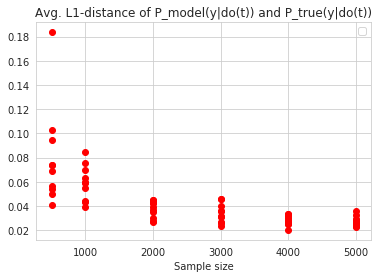

In [307]:
"""Plot causal distance results"""
plt.figure()
plt.xlabel("Sample size")
plt.legend(["True value"])
plt.title("Avg. L1-distance of P_model(y|do(t)) and P_true(y|do(t))")
for datasize in datasizes:
    for i in range(datasize_times):
        plt.plot(datasize, avg_causal_dists[datasize][i],'ro',)

Text(0.5, 1.0, 'P(t)')

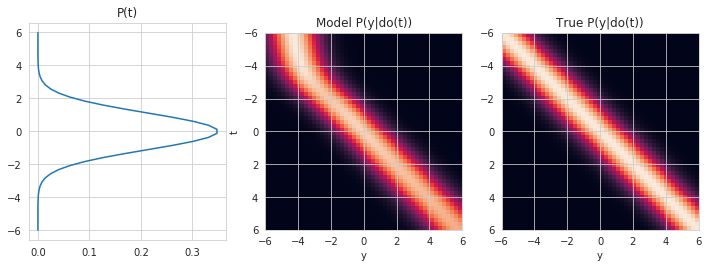

In [297]:
model = models[5000][6]
avg_causal_dist, py_dot_model, py_dot_true, y_range, t_range, pt_true = avg_causal_L1_dist_general(model=model, n=50, c_yt=c_yt, c_yz=c_yz, s_y=s_y, c_t=c_t, s_t=s_t, c_x=c_x)

fig, axes = plt.subplots(1,3, figsize=(12,4))
axes[1].imshow(py_dot_model, extent=(y_range[0], y_range[-1], t_range[-1],t_range[0]))
axes[2].imshow(py_dot_true, extent=(y_range[0], y_range[-1], t_range[-1],t_range[0]))
axes[1].set_xlabel("y")
axes[1].set_ylabel("t")
axes[2].set_xlabel("y")
axes[1].set_title("Model P(y|do(t))")
axes[2].set_title("True P(y|do(t))")
axes[0].plot(pt_true,t_range)
axes[0].set_title("P(t)")

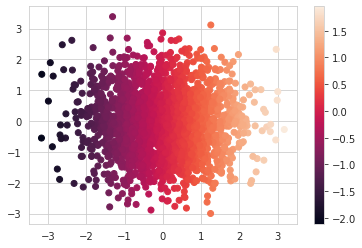

In [833]:
zt = torch.cat([torch.randn((2000,2)),0*torch.ones((2000,1))], axis=1)
y_mean = model.decoder.y_nn_real(zt)
plt.figure()
plt.scatter(zt[:,0],zt[:,1],c=y_mean[:,0].detach().numpy().squeeze())
plt.colorbar()

## Nonidentifiable model with only one proxy x

In [264]:
"""Let's define the model here"""
c_x = np.array([2])
s_x = np.array([0.7])
c_t = np.array([0.5])
s_t = np.array([1])
c_yz = np.array([0.6])
c_yt = np.array([1])
s_y = np.array([1])

In [265]:
"""define all kinds of other things"""
datasizes = [500,1000,2000,3000,4000,5000]
datasize_times = 10
num_epochs = [500,300,200,150,150,150]
lr_start = [0.05,0.05,0.05,0.05,0.05,0.05]
lr_end = [0.001,0.001,0.001,0.001,0.001,0.001]
input_dim = 1
z_dim = 1
folder = "linear_data_1_proxy_x"
name = "linear_1_proxy_x"
BATCH_SIZE = 100
binary_t_y = False
p_y_zt_nn = False
q_z_xty_nn = False
dataparameters = [c_x, c_t, c_yz, c_yt, s_x, s_t, s_y]#Be careful that these are the correct way around
track_function = lambda model: model.decoder.y_nn.weight
true_value = c_yt
device = "cpu"

In [266]:
"""Run the training of the model. Skip this cell if you just want to reload the data."""
dfs, models = run_model_for_data_sets(datasizes,datasize_times,num_epochs,lr_start,lr_end,input_dim,z_dim,
                       folder,name,BATCH_SIZE,binary_t_y,p_y_zt_nn,q_z_xty_nn,
                        linear_data_df, dataparameters, track_function, true_value, device)

Creation of the directory data/linear_data_1_proxy_x/ failed. Trying to empty the same folder.
Training data size 500, run 1
Estimated causal effect: Parameter containing:
tensor([[-0.8936,  0.7462]], requires_grad=True) true value: [1]
Training data size 500, run 2
Estimated causal effect: Parameter containing:
tensor([[0.8488, 0.8163]], requires_grad=True) true value: [1]
Training data size 500, run 3
Estimated causal effect: Parameter containing:
tensor([[-0.7891,  0.8898]], requires_grad=True) true value: [1]
Training data size 500, run 4
Estimated causal effect: Parameter containing:
tensor([[-0.8837,  0.8203]], requires_grad=True) true value: [1]
Training data size 500, run 5
Estimated causal effect: Parameter containing:
tensor([[0.9060, 0.8185]], requires_grad=True) true value: [1]
Training data size 500, run 6
Estimated causal effect: Parameter containing:
tensor([[0.9280, 0.8522]], requires_grad=True) true value: [1]
Training data size 500, run 7
Estimated causal effect: Para

Estimated causal effect: Parameter containing:
tensor([[0.8053, 0.8605]], requires_grad=True) true value: [1]
Training data size 5000, run 9
Estimated causal effect: Parameter containing:
tensor([[0.8726, 0.8450]], requires_grad=True) true value: [1]
Training data size 5000, run 10
Estimated causal effect: Parameter containing:
tensor([[0.8238, 0.8674]], requires_grad=True) true value: [1]


In [267]:
"""Load the generated data"""
dfs, models = load_dfs_models(folder, name,
                   input_dim=input_dim, z_dim=z_dim, device=device, binary_t_y=binary_t_y,
                  p_y_zt_nn=p_y_zt_nn, q_z_xty_nn=q_z_xty_nn)
datasizes = sorted(list(models.keys()))
datasize_times = max(list(models[next(iter(models))].keys()))+1

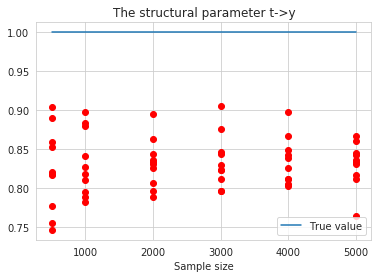

In [268]:
"""Plot results"""
#NOTE: why is 5000 worse than 2000? Problems with the optimization or real issues?
plt.figure()
plt.plot([datasizes[0], datasizes[-1]], 2*[c_yt])
plt.title("The structural parameter t->y")
plt.xlabel("Sample size")
plt.legend(["True value"])
for datasize in datasizes:
    for i in range(datasize_times):
        plt.plot(datasize, models[datasize][i].decoder.y_nn.weight[0,1].detach().numpy(),'ro',)

In [39]:
avg_causal_dists = {}
for datasize in datasizes:
    avg_causal_dists[datasize] = {}
    for i in range(datasize_times):
        print("{},{}".format(datasize,i))
        model = models[datasize][i]
        avg_causal_dists[datasize][i],_,_,_,_,_ = avg_causal_L1_dist(model=model, c_yt=c_yt, c_yz=c_yz, s_y=s_y, 
                                                                   c_t=c_t, s_t=s_t, c_x=c_x, p_y_zt_nn=p_y_zt_nn,
                                                                  n=200)

100,0
100,1
100,2
100,3
100,4
100,5
100,6
100,7
100,8
100,9
200,0
200,1
200,2
200,3
200,4
200,5
200,6
200,7
200,8
200,9
500,0
500,1
500,2
500,3
500,4
500,5
500,6
500,7
500,8
500,9
1000,0
1000,1
1000,2
1000,3
1000,4
1000,5
1000,6
1000,7
1000,8
1000,9
2000,0
2000,1
2000,2
2000,3
2000,4
2000,5
2000,6
2000,7
2000,8
2000,9
5000,0
5000,1
5000,2
5000,3
5000,4
5000,5
5000,6
5000,7
5000,8
5000,9


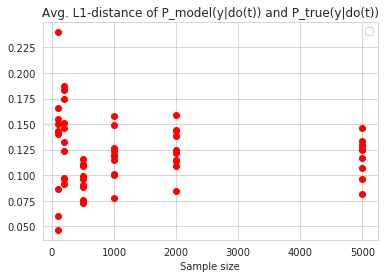

In [40]:
"""Plot causal distance results"""
plt.figure()
plt.xlabel("Sample size")
plt.legend(["True value"])
plt.title("Avg. L1-distance of P_model(y|do(t)) and P_true(y|do(t))")
for datasize in datasizes:
    for i in range(datasize_times):
        plt.plot(datasize, avg_causal_dists[datasize][i],'ro',)

Text(0.5, 1.0, 'P(t)')

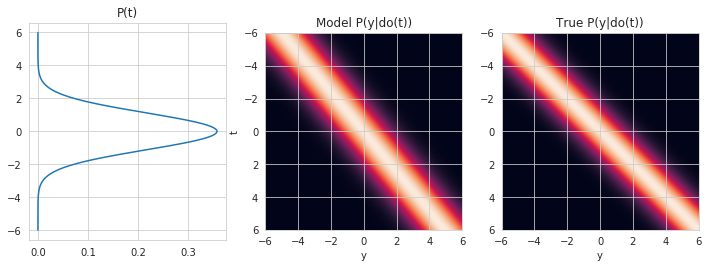

In [41]:
model = models[5000][0]
avg_causal_dist, py_dot_model, py_dot_true, y_range, t_range, pt_true = avg_causal_L1_dist(model=model, c_yt=c_yt, c_yz=c_yz, s_y=s_y, 
                                                                   c_t=c_t, s_t=s_t, c_x=c_x, p_y_zt_nn=p_y_zt_nn,
                                                                  n=200)
fig, axes = plt.subplots(1,3, figsize=(12,4))
axes[1].imshow(py_dot_model, extent=(y_range[0], y_range[-1], t_range[-1],t_range[0]))
axes[2].imshow(py_dot_true, extent=(y_range[0], y_range[-1], t_range[-1],t_range[0]))
axes[1].set_xlabel("y")
axes[1].set_ylabel("t")
axes[2].set_xlabel("y")
axes[1].set_title("Model P(y|do(t))")
axes[2].set_title("True P(y|do(t))")
axes[0].plot(pt_true,t_range)
axes[0].set_title("P(t)")

# Testing on data with t, y binary

## Case with moderate nonlinearities

In [269]:
c_x = np.array([1,2])
s_x = np.array([0.5,0.7])
t_a = np.array([1])#Make this larger to amplify amplify nonlinearities
t_b = np.array([0.5])
y_a0 = np.array([2])
y_b0 = np.array([-0.5])
y_a1 = np.array([2])
y_b1 = np.array([0.5])

In [270]:
p_y_zt1_true, p_y_zt0_true = p_y_zt_from_true_dist(y_a0, y_b0, y_a1, y_b1)
true_ate = linear_binary_ty_ate(p_y_zt1_true, p_y_zt0_true)
print("True ATE: {}".format(true_ate))

True ATE: 0.15048506347526708


In [286]:
"""define all kinds of other things"""
datasizes = [500,1000,2000,3000,4000,5000]
datasize_times = 10
num_epochs = [500,300,200,150,150,150]
lr_start = [0.05,0.05,0.05,0.05,0.05,0.05]
lr_end = [0.001,0.001,0.001,0.001,0.001,0.001]
input_dim = 2
z_dim = 1
folder = "linear_binary_data"
name = "linear_binary"
BATCH_SIZE = 100
binary_t_y = True
p_y_zt_nn = False
q_z_xty_nn = False
dataparameters = [c_x, s_x, t_a, t_b, y_a0, y_b0, y_a1, y_b1]#Be careful that these are the correct way around
track_function = lambda model: model.decoder.y1_nn.weight
true_value = y_a1
device = "cpu"
generate_df = linear_data_binary_ty_df

In [287]:
"""Run the training of the model. Skip this cell if you just want to reload the data."""
dfs, models = run_model_for_data_sets(datasizes,datasize_times,num_epochs,lr_start,lr_end,input_dim,z_dim,
                       folder,name,BATCH_SIZE,binary_t_y,p_y_zt_nn,q_z_xty_nn,
                        generate_df, dataparameters, track_function, true_value, device)

Current run is terminating due to exception: 'Decoder' object has no attribute 'treatment_pred'.
Engine run is terminating due to exception: 'Decoder' object has no attribute 'treatment_pred'.


Creation of the directory data/linear_binary_data/ failed. Trying to empty the same folder.
Training data size 500, run 1


AttributeError: 'Decoder' object has no attribute 'treatment_pred'

In [451]:
"""Load the generated data"""
dfs, models = load_dfs_models(folder, name,
                   input_dim=input_dim, z_dim=z_dim, device=device, binary_t_y=binary_t_y,
                  p_y_zt_nn=p_y_zt_nn, q_z_xty_nn=q_z_xty_nn)
datasizes = sorted(list(models.keys()))
datasize_times = max(list(models[next(iter(models))].keys()))+1

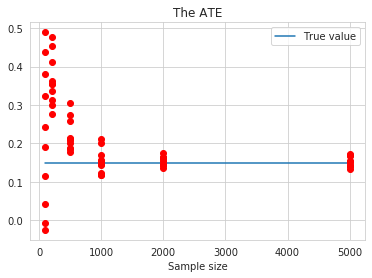

In [452]:
"""Plot results"""
plt.figure()
plt.plot([datasizes[0], datasizes[-1]], 2*[true_ate])
plt.title("The ATE")
plt.xlabel("Sample size")
plt.legend(["True value"])
for datasize in datasizes:
    for i in range(datasize_times):
        p_y_zt1_model, p_y_zt0_model = p_y_zt_from_model(models[datasize][i], p_y_zt_nn)
        model_ate = linear_binary_ty_ate(p_y_zt1_model, p_y_zt0_model)
        plt.plot(datasize, model_ate,'ro',)

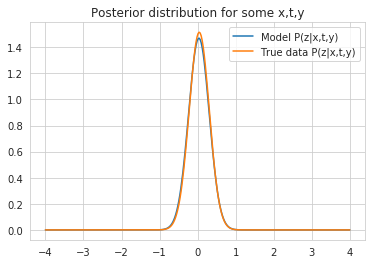

In [457]:
#Visualizing the inferred posterior distribution
model = models[5000][1]
x0 = 0
x1 = 0
mean = model.encoder.q_z_nn_t0y1(torch.Tensor([x0,x1])).detach().numpy()
std = torch.exp(model.encoder.z_logstd_t0y1).detach().numpy()

lim = 4
n = 300
z = np.linspace(-lim,lim,n)
def sigmoid(x):
    return 1/(1+np.exp(-x))
pz_xty = scipy.stats.norm.pdf(x0, loc=c_x[0]*z, scale=s_x[0]) \
        *scipy.stats.norm.pdf(x1, loc=c_x[1]*z, scale=s_x[1]) \
        *(1-sigmoid(t_a*z + t_b))*sigmoid(y_a0*z + y_b0) \
        *scipy.stats.norm.pdf(z)
pz_xty = pz_xty / (pz_xty.sum()*2*lim/n)

plt.figure()
plt.plot(z, scipy.stats.norm.pdf(z,loc=mean, scale=std))
num_samples = 100000
df = linear_data_binary_ty_df(num_samples, c_x, s_x, t_a, t_b, y_a0, y_b0, y_a1, y_b1)
plt.plot(z,pz_xty)
plt.legend(['Model P(z|x,t,y)', 'True data P(z|x,t,y)'])
plt.title("Posterior distribution for some x,t,y")
plt.show()

## Case with strong nonlinearities

In [540]:
c_x = np.array([1,2])
s_x = np.array([0.5,0.7])
t_a = np.array([10])#Make this larger to amplify amplify nonlinearities
t_b = np.array([0.5])
y_a0 = np.array([2])
y_b0 = np.array([-0.5])
y_a1 = np.array([2])
y_b1 = np.array([0.5])

In [541]:
p_y_zt1_true, p_y_zt0_true = p_y_zt_from_true_dist(y_a0, y_b0, y_a1, y_b1)
true_ate = linear_binary_ty_ate(p_y_zt1_true, p_y_zt0_true)
print("True ATE: {}".format(true_ate))

True ATE: 0.15048506347526708


In [542]:
"""define all kinds of other things"""
datasizes = [100,200,500,1000,2000,5000]
datasize_times = 10
num_epochs = 200#Should be about enough to train the 100 case with these parameters as well
lr_start = 0.01
lr_end = 0.001
input_dim = 2
z_dim = 1
folder = "linear_binary_data_strong_nonlinear"
name = "linear_binary_strong_nonlinear"
BATCH_SIZE = 100
binary_t_y = True
p_y_zt_nn = False
q_z_xty_nn = False
dataparameters = [c_x, s_x, t_a, t_b, y_a0, y_b0, y_a1, y_b1]#Be careful that these are the correct way around
track_function = lambda model: model.decoder.y1_nn.weight
true_value = y_a1
device = "cpu"
generate_df = linear_data_binary_ty_df

In [543]:
"""Run the training of the model. Skip this cell if you just want to reload the data."""
dfs, models = run_model_for_data_sets(datasizes,datasize_times,num_epochs,lr_start,lr_end,input_dim,z_dim,
                       folder,name,BATCH_SIZE,binary_t_y,p_y_zt_nn,q_z_xty_nn,
                        generate_df, dataparameters, track_function, true_value, device)

Creation of the directory data/linear_binary_data_strong_nonlinear/ failed. Trying to empty the same folder.
Training data size 100, run 1
Estimated causal effect: Parameter containing:
tensor([[-0.2862]], requires_grad=True) true value: [2]
Training data size 100, run 2
Estimated causal effect: Parameter containing:
tensor([[0.0143]], requires_grad=True) true value: [2]
Training data size 100, run 3
Estimated causal effect: Parameter containing:
tensor([[-0.0550]], requires_grad=True) true value: [2]
Training data size 100, run 4
Estimated causal effect: Parameter containing:
tensor([[-0.0668]], requires_grad=True) true value: [2]
Training data size 100, run 5
Estimated causal effect: Parameter containing:
tensor([[-0.1740]], requires_grad=True) true value: [2]
Training data size 100, run 6
Estimated causal effect: Parameter containing:
tensor([[-0.2252]], requires_grad=True) true value: [2]
Training data size 100, run 7
Estimated causal effect: Parameter containing:
tensor([[-0.2228]

In [547]:
"""Load the generated data"""
dfs, models = load_dfs_models(folder, name,
                   input_dim=input_dim, z_dim=z_dim, device=device, binary_t_y=binary_t_y,
                  p_y_zt_nn=p_y_zt_nn, q_z_xty_nn=q_z_xty_nn)
datasizes = sorted(list(models.keys()))
datasize_times = max(list(models[next(iter(models))].keys()))+1

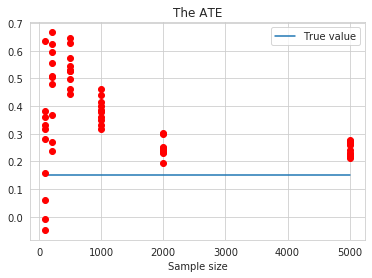

In [548]:
"""Plot results"""
plt.figure()
plt.plot([datasizes[0], datasizes[-1]], 2*[true_ate])
plt.title("The ATE")
plt.xlabel("Sample size")
plt.legend(["True value"])
for datasize in datasizes:
    for i in range(datasize_times):
        p_y_zt1_model, p_y_zt0_model = p_y_zt_from_model(models[datasize][i], p_y_zt_nn)
        model_ate = linear_binary_ty_ate(p_y_zt1_model, p_y_zt0_model)
        plt.plot(datasize, model_ate,'ro',)

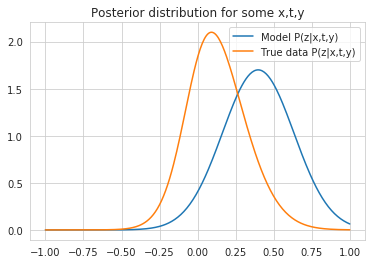

In [564]:
#Visualizing the inferred posterior distribution
model = models[5000][1]
x0 = 1
x1 = 1
mean = model.encoder.q_z_nn_t0y1(torch.Tensor([x0,x1])).detach().numpy()
std = torch.exp(model.encoder.z_logstd_t0y1).detach().numpy()

lim = 1
n = 300
z = np.linspace(-lim,lim,n)
def sigmoid(x):
    return 1/(1+np.exp(-x))
pz_xty = scipy.stats.norm.pdf(x0, loc=c_x[0]*z, scale=s_x[0]) \
        *scipy.stats.norm.pdf(x1, loc=c_x[1]*z, scale=s_x[1]) \
        *(1-sigmoid(t_a*z + t_b))*sigmoid(y_a0*z + y_b0) \
        *scipy.stats.norm.pdf(z)
pz_xty = pz_xty / (pz_xty.sum()*2*lim/n)

plt.figure()
plt.plot(z, scipy.stats.norm.pdf(z,loc=mean, scale=std))
#num_samples = 100000
#df = linear_data_binary_ty_df(num_samples, c_x, s_x, t_a, t_b, y_a0, y_b0, y_a1, y_b1)
plt.plot(z,pz_xty)
plt.legend(['Model P(z|x,t,y)', 'True data P(z|x,t,y)'])
plt.title("Posterior distribution for some x,t,y")
plt.show()

## Strong nonlinearities, q(z|x,t,y) is a neural network and its variance is estimated for each sample

In [589]:
c_x = np.array([1,2])
s_x = np.array([0.5,0.7])
t_a = np.array([10])#Make this larger to amplify amplify nonlinearities
t_b = np.array([0.5])
y_a0 = np.array([2])
y_b0 = np.array([-0.5])
y_a1 = np.array([2])
y_b1 = np.array([0.5])

In [590]:
p_y_zt1_true, p_y_zt0_true = p_y_zt_from_true_dist(y_a0, y_b0, y_a1, y_b1)
true_ate = linear_binary_ty_ate(p_y_zt1_true, p_y_zt0_true)
print("True ATE: {}".format(true_ate))

True ATE: 0.15048506347526708


In [591]:
"""define all kinds of other things"""
datasizes = [100,200,500,1000,2000,5000]
datasize_times = 10
num_epochs = 200#Should be about enough to train the 100 case with these parameters as well
lr_start = 0.01
lr_end = 0.001
input_dim = 2
z_dim = 1
folder = "linear_binary_data_strong_nonlinear_nn"
name = "linear_binary_strong_nonlinear_nn"
BATCH_SIZE = 100
binary_t_y = True
p_y_zt_nn = False
q_z_xty_nn = True
dataparameters = [c_x, s_x, t_a, t_b, y_a0, y_b0, y_a1, y_b1]#Be careful that these are the correct way around
track_function = lambda model: model.decoder.y1_nn.weight
true_value = y_a1
device = "cpu"
generate_df = linear_data_binary_ty_df

In [592]:
"""Run the training of the model. Skip this cell if you just want to reload the data."""
dfs, models = run_model_for_data_sets(datasizes,datasize_times,num_epochs,lr_start,lr_end,input_dim,z_dim,
                       folder,name,BATCH_SIZE,binary_t_y,p_y_zt_nn,q_z_xty_nn,
                        generate_df, dataparameters, track_function, true_value, device)

Training data size 100, run 1
Estimated causal effect: Parameter containing:
tensor([[-1.0327]], requires_grad=True) true value: [2]
Training data size 100, run 2
Estimated causal effect: Parameter containing:
tensor([[1.2918]], requires_grad=True) true value: [2]
Training data size 100, run 3
Estimated causal effect: Parameter containing:
tensor([[1.0182]], requires_grad=True) true value: [2]
Training data size 100, run 4
Estimated causal effect: Parameter containing:
tensor([[-0.0720]], requires_grad=True) true value: [2]
Training data size 100, run 5
Estimated causal effect: Parameter containing:
tensor([[-0.4055]], requires_grad=True) true value: [2]
Training data size 100, run 6
Estimated causal effect: Parameter containing:
tensor([[-0.1219]], requires_grad=True) true value: [2]
Training data size 100, run 7
Estimated causal effect: Parameter containing:
tensor([[0.2297]], requires_grad=True) true value: [2]
Training data size 100, run 8
Estimated causal effect: Parameter contain

In [593]:
"""Load the generated data"""
dfs, models = load_dfs_models(folder, name,
                   input_dim=input_dim, z_dim=z_dim, device=device, binary_t_y=binary_t_y,
                  p_y_zt_nn=p_y_zt_nn, q_z_xty_nn=q_z_xty_nn)
datasizes = sorted(list(models.keys()))
datasize_times = max(list(models[next(iter(models))].keys()))+1

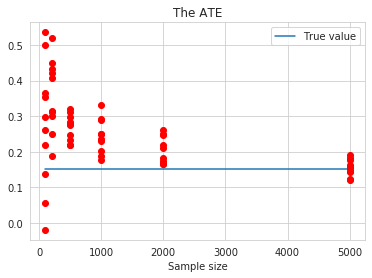

In [594]:
"""Plot results"""
plt.figure()
plt.plot([datasizes[0], datasizes[-1]], 2*[true_ate])
plt.title("The ATE")
plt.xlabel("Sample size")
plt.legend(["True value"])
for datasize in datasizes:
    for i in range(datasize_times):
        p_y_zt1_model, p_y_zt0_model = p_y_zt_from_model(models[datasize][i], p_y_zt_nn)
        model_ate = linear_binary_ty_ate(p_y_zt1_model, p_y_zt0_model)
        plt.plot(datasize, model_ate,'ro',)

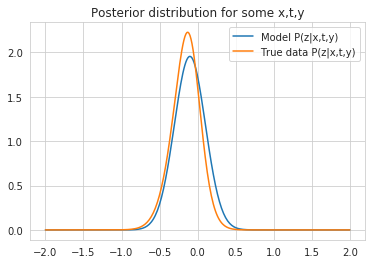

In [604]:
#Visualizing the inferred posterior distribution
model = models[5000][2]
x0 = 0
x1 = 0
mean = model.encoder.q_z_nn_t0y1_real(torch.Tensor([x0,x1]))[0].detach().numpy()
std = torch.exp(model.encoder.q_z_nn_t0y1_real(torch.Tensor([x0,x1]))[1]).detach().numpy()

lim = 2
n = 300
z = np.linspace(-lim,lim,n)
def sigmoid(x):
    return 1/(1+np.exp(-x))
pz_xty = scipy.stats.norm.pdf(x0, loc=c_x[0]*z, scale=s_x[0]) \
        *scipy.stats.norm.pdf(x1, loc=c_x[1]*z, scale=s_x[1]) \
        *(1-sigmoid(t_a*z + t_b))*sigmoid(y_a0*z + y_b0) \
        *scipy.stats.norm.pdf(z)
pz_xty = pz_xty / (pz_xty.sum()*2*lim/n)

plt.figure()
plt.plot(z, scipy.stats.norm.pdf(z,loc=mean, scale=std))
#num_samples = 100000
#df = linear_data_binary_ty_df(num_samples, c_x, s_x, t_a, t_b, y_a0, y_b0, y_a1, y_b1)
plt.plot(z,pz_xty)
plt.legend(['Model P(z|x,t,y)', 'True data P(z|x,t,y)'])
plt.title("Posterior distribution for some x,t,y")
plt.show()

## More strong nonlinearities, q(z|x,t,y) is a neural network and its variance is estimated for each sample

In [629]:
c_x = np.array([1,2])
s_x = np.array([0.5,0.7])
t_a = np.array([50])#Make this larger to amplify amplify nonlinearities
t_b = np.array([0.5])
y_a0 = np.array([2])
y_b0 = np.array([-0.5])
y_a1 = np.array([2])
y_b1 = np.array([0.5])

In [630]:
p_y_zt1_true, p_y_zt0_true = p_y_zt_from_true_dist(y_a0, y_b0, y_a1, y_b1)
true_ate = linear_binary_ty_ate(p_y_zt1_true, p_y_zt0_true)
print("True ATE: {}".format(true_ate))

True ATE: 0.15048506347526708


In [632]:
"""define all kinds of other things"""
datasizes = [100,200,500,1000,2000,5000]
datasize_times = 10
num_epochs = 200#Should be about enough to train the 100 case with these parameters as well
lr_start = 0.01
lr_end = 0.001
input_dim = 2
z_dim = 1
folder = "linear_binary_data_stronger_nonlinear_nn"
name = "linear_binary_stronger_nonlinear_nn"
BATCH_SIZE = 100
binary_t_y = True
p_y_zt_nn = False
q_z_xty_nn = True
dataparameters = [c_x, s_x, t_a, t_b, y_a0, y_b0, y_a1, y_b1]#Be careful that these are the correct way around
track_function = lambda model: model.decoder.y1_nn.weight
true_value = y_a1
device = "cpu"
generate_df = linear_data_binary_ty_df

In [633]:
"""Run the training of the model. Skip this cell if you just want to reload the data."""
dfs, models = run_model_for_data_sets(datasizes,datasize_times,num_epochs,lr_start,lr_end,input_dim,z_dim,
                       folder,name,BATCH_SIZE,binary_t_y,p_y_zt_nn,q_z_xty_nn,
                        generate_df, dataparameters, track_function, true_value, device)

Training data size 100, run 1
Estimated causal effect: Parameter containing:
tensor([[0.2164]], requires_grad=True) true value: [2]
Training data size 100, run 2
Estimated causal effect: Parameter containing:
tensor([[0.2684]], requires_grad=True) true value: [2]
Training data size 100, run 3
Estimated causal effect: Parameter containing:
tensor([[0.3863]], requires_grad=True) true value: [2]
Training data size 100, run 4
Estimated causal effect: Parameter containing:
tensor([[-0.9859]], requires_grad=True) true value: [2]
Training data size 100, run 5
Estimated causal effect: Parameter containing:
tensor([[-0.9726]], requires_grad=True) true value: [2]
Training data size 100, run 6
Estimated causal effect: Parameter containing:
tensor([[0.7551]], requires_grad=True) true value: [2]
Training data size 100, run 7
Estimated causal effect: Parameter containing:
tensor([[0.2993]], requires_grad=True) true value: [2]
Training data size 100, run 8
Estimated causal effect: Parameter containin

In [634]:
"""Load the generated data"""
dfs, models = load_dfs_models(folder, name,
                   input_dim=input_dim, z_dim=z_dim, device=device, binary_t_y=binary_t_y,
                  p_y_zt_nn=p_y_zt_nn, q_z_xty_nn=q_z_xty_nn)
datasizes = sorted(list(models.keys()))
datasize_times = max(list(models[next(iter(models))].keys()))+1

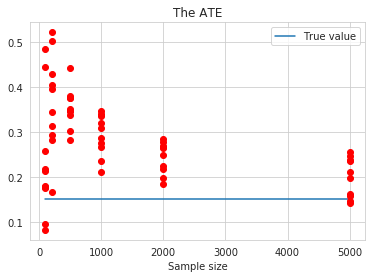

In [635]:
"""Plot results"""
plt.figure()
plt.plot([datasizes[0], datasizes[-1]], 2*[true_ate])
plt.title("The ATE")
plt.xlabel("Sample size")
plt.legend(["True value"])
for datasize in datasizes:
    for i in range(datasize_times):
        p_y_zt1_model, p_y_zt0_model = p_y_zt_from_model(models[datasize][i], p_y_zt_nn)
        model_ate = linear_binary_ty_ate(p_y_zt1_model, p_y_zt0_model)
        plt.plot(datasize, model_ate,'ro',)

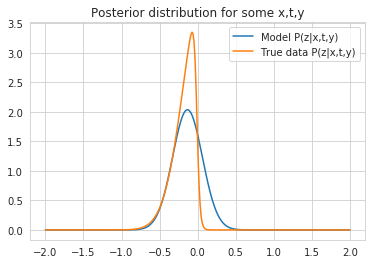

In [645]:
#Visualizing the inferred posterior distribution
model = models[5000][2]
x0 = 0
x1 = 0
mean = model.encoder.q_z_nn_t0y1_real(torch.Tensor([x0,x1]))[0].detach().numpy()
std = torch.exp(model.encoder.q_z_nn_t0y1_real(torch.Tensor([x0,x1]))[1]).detach().numpy()

lim = 2
n = 300
z = np.linspace(-lim,lim,n)
def sigmoid(x):
    return 1/(1+np.exp(-x))
pz_xty = scipy.stats.norm.pdf(x0, loc=c_x[0]*z, scale=s_x[0]) \
        *scipy.stats.norm.pdf(x1, loc=c_x[1]*z, scale=s_x[1]) \
        *(1-sigmoid(t_a*z + t_b))*sigmoid(y_a0*z + y_b0) \
        *scipy.stats.norm.pdf(z)
pz_xty = pz_xty / (pz_xty.sum()*2*lim/n)

plt.figure()
plt.plot(z, scipy.stats.norm.pdf(z,loc=mean, scale=std))
#num_samples = 100000
#df = linear_data_binary_ty_df(num_samples, c_x, s_x, t_a, t_b, y_a0, y_b0, y_a1, y_b1)
plt.plot(z,pz_xty)
plt.legend(['Model P(z|x,t,y)', 'True data P(z|x,t,y)'])
plt.title("Posterior distribution for some x,t,y")
plt.show()

## Individual "perfect" linear model testing

In [112]:
c_x = np.array([1,2])
s_x = np.array([0.5,0.7])
c_t = np.array([0.5])
s_t = np.array([1])
c_yz = np.array([0.6])
c_yt = np.array([1])
s_y = np.array([1])

In [167]:
%autoreload 2
BATCH_SIZE = 500
num_samples = 500
df = linear_data_df(num_samples, c_x, c_t, c_yz, c_yt, s_x, s_t, s_y)
dataset = LinearDataset(df)
dataloader = LinearDataLoader(dataset, validation_split=0.0)
train_loader, test_loader = dataloader.get_loaders(batch_size=BATCH_SIZE)
#dummy test loader
test_loader, _ = LinearDataLoader(LinearDataset(df[:1]), validation_split=0.0).get_loaders(batch_size=1)

Training Results - Epoch 1 - y_reconc_loss: 1151.2893 x_reconc_loss: 2154.7534 t_reconc_loss: 1027.8486 kld_loss: 2163.0732 total_loss: 6496.9648 learning rate: 0.0496
Training Results - Epoch 2 - y_reconc_loss: 1094.4174 x_reconc_loss: 2130.1145 t_reconc_loss: 1000.9763 kld_loss: 1788.3007 total_loss: 6013.8091 learning rate: 0.0491
Training Results - Epoch 3 - y_reconc_loss: 1072.5496 x_reconc_loss: 2083.7864 t_reconc_loss: 962.8527 kld_loss: 1486.9996 total_loss: 5606.1880 learning rate: 0.0487
Training Results - Epoch 4 - y_reconc_loss: 1039.8624 x_reconc_loss: 2048.0957 t_reconc_loss: 934.1378 kld_loss: 1243.9957 total_loss: 5266.0913 learning rate: 0.0483
Training Results - Epoch 5 - y_reconc_loss: 1008.1039 x_reconc_loss: 2023.8230 t_reconc_loss: 909.8495 kld_loss: 1051.9930 total_loss: 4993.7695 learning rate: 0.0479
Training Results - Epoch 6 - y_reconc_loss: 987.0123 x_reconc_loss: 1992.8254 t_reconc_loss: 889.4169 kld_loss: 902.2395 total_loss: 4771.4941 learning rate: 0.047

Training Results - Epoch 56 - y_reconc_loss: 758.8095 x_reconc_loss: 1521.9989 t_reconc_loss: 691.0059 kld_loss: 246.1693 total_loss: 3217.9836 learning rate: 0.0307
Training Results - Epoch 57 - y_reconc_loss: 754.6911 x_reconc_loss: 1489.3900 t_reconc_loss: 683.6402 kld_loss: 251.3437 total_loss: 3179.0652 learning rate: 0.0305
Training Results - Epoch 58 - y_reconc_loss: 759.0435 x_reconc_loss: 1504.5884 t_reconc_loss: 681.2831 kld_loss: 260.2076 total_loss: 3205.1226 learning rate: 0.0302
Training Results - Epoch 59 - y_reconc_loss: 752.4919 x_reconc_loss: 1465.9279 t_reconc_loss: 684.3987 kld_loss: 266.4592 total_loss: 3169.2778 learning rate: 0.0299
Training Results - Epoch 60 - y_reconc_loss: 754.0765 x_reconc_loss: 1448.3682 t_reconc_loss: 679.2296 kld_loss: 273.5930 total_loss: 3155.2673 learning rate: 0.0297
Training Results - Epoch 61 - y_reconc_loss: 752.5907 x_reconc_loss: 1481.3920 t_reconc_loss: 681.2735 kld_loss: 278.1911 total_loss: 3193.4475 learning rate: 0.0294
Trai

Training Results - Epoch 107 - y_reconc_loss: 718.4365 x_reconc_loss: 1230.4729 t_reconc_loss: 660.4082 kld_loss: 413.4376 total_loss: 3022.7551 learning rate: 0.0197
Training Results - Epoch 108 - y_reconc_loss: 708.4401 x_reconc_loss: 1187.1582 t_reconc_loss: 673.0449 kld_loss: 416.3494 total_loss: 2984.9924 learning rate: 0.0196
Training Results - Epoch 109 - y_reconc_loss: 724.9246 x_reconc_loss: 1241.4659 t_reconc_loss: 673.7229 kld_loss: 417.1909 total_loss: 3057.3044 learning rate: 0.0194
Training Results - Epoch 110 - y_reconc_loss: 720.0854 x_reconc_loss: 1194.4540 t_reconc_loss: 674.0983 kld_loss: 417.9284 total_loss: 3006.5662 learning rate: 0.0192
Training Results - Epoch 111 - y_reconc_loss: 738.0421 x_reconc_loss: 1209.6738 t_reconc_loss: 677.6402 kld_loss: 422.0812 total_loss: 3047.4373 learning rate: 0.0190
Training Results - Epoch 112 - y_reconc_loss: 720.9068 x_reconc_loss: 1197.7395 t_reconc_loss: 682.4977 kld_loss: 427.3721 total_loss: 3028.5161 learning rate: 0.018

Training Results - Epoch 158 - y_reconc_loss: 713.0819 x_reconc_loss: 1124.7582 t_reconc_loss: 674.2596 kld_loss: 504.3848 total_loss: 3016.4844 learning rate: 0.0127
Training Results - Epoch 159 - y_reconc_loss: 723.7447 x_reconc_loss: 1107.3616 t_reconc_loss: 673.0197 kld_loss: 508.7918 total_loss: 3012.9177 learning rate: 0.0126
Training Results - Epoch 160 - y_reconc_loss: 716.0350 x_reconc_loss: 1053.2797 t_reconc_loss: 671.6746 kld_loss: 507.4940 total_loss: 2948.4832 learning rate: 0.0124
Training Results - Epoch 161 - y_reconc_loss: 708.6803 x_reconc_loss: 1100.5668 t_reconc_loss: 675.8432 kld_loss: 502.6230 total_loss: 2987.7134 learning rate: 0.0123
Training Results - Epoch 162 - y_reconc_loss: 733.2569 x_reconc_loss: 1046.4609 t_reconc_loss: 672.4066 kld_loss: 498.7434 total_loss: 2950.8679 learning rate: 0.0122
Training Results - Epoch 163 - y_reconc_loss: 716.0328 x_reconc_loss: 1053.9320 t_reconc_loss: 675.6695 kld_loss: 495.4032 total_loss: 2941.0376 learning rate: 0.012

Training Results - Epoch 211 - y_reconc_loss: 719.0499 x_reconc_loss: 1031.8456 t_reconc_loss: 677.7870 kld_loss: 538.8315 total_loss: 2967.5139 learning rate: 0.0080
Training Results - Epoch 212 - y_reconc_loss: 726.1556 x_reconc_loss: 1030.3438 t_reconc_loss: 675.1875 kld_loss: 536.6398 total_loss: 2968.3269 learning rate: 0.0079
Training Results - Epoch 213 - y_reconc_loss: 712.8521 x_reconc_loss: 1022.5290 t_reconc_loss: 672.2032 kld_loss: 534.5532 total_loss: 2942.1375 learning rate: 0.0078
Training Results - Epoch 214 - y_reconc_loss: 721.9703 x_reconc_loss: 1026.8577 t_reconc_loss: 673.1287 kld_loss: 531.3623 total_loss: 2953.3188 learning rate: 0.0078
Training Results - Epoch 215 - y_reconc_loss: 711.9074 x_reconc_loss: 1052.7328 t_reconc_loss: 680.2613 kld_loss: 529.6425 total_loss: 2974.5439 learning rate: 0.0077
Training Results - Epoch 216 - y_reconc_loss: 717.2320 x_reconc_loss: 1038.5251 t_reconc_loss: 678.1428 kld_loss: 530.5922 total_loss: 2964.4922 learning rate: 0.007

Training Results - Epoch 264 - y_reconc_loss: 727.9527 x_reconc_loss: 978.1381 t_reconc_loss: 679.6378 kld_loss: 556.4571 total_loss: 2942.1855 learning rate: 0.0050
Training Results - Epoch 265 - y_reconc_loss: 727.5279 x_reconc_loss: 1022.9903 t_reconc_loss: 677.7278 kld_loss: 557.9030 total_loss: 2986.1489 learning rate: 0.0050
Training Results - Epoch 266 - y_reconc_loss: 720.8766 x_reconc_loss: 989.4189 t_reconc_loss: 676.2195 kld_loss: 559.1048 total_loss: 2945.6199 learning rate: 0.0050
Training Results - Epoch 267 - y_reconc_loss: 709.3112 x_reconc_loss: 998.9742 t_reconc_loss: 678.6176 kld_loss: 558.7618 total_loss: 2945.6650 learning rate: 0.0049
Training Results - Epoch 268 - y_reconc_loss: 722.0033 x_reconc_loss: 1035.3875 t_reconc_loss: 677.4727 kld_loss: 556.2900 total_loss: 2991.1533 learning rate: 0.0049
Training Results - Epoch 269 - y_reconc_loss: 711.6818 x_reconc_loss: 995.7285 t_reconc_loss: 664.5731 kld_loss: 555.4755 total_loss: 2927.4590 learning rate: 0.0048
Tr

Training Results - Epoch 318 - y_reconc_loss: 716.0229 x_reconc_loss: 1001.6215 t_reconc_loss: 676.5994 kld_loss: 567.5411 total_loss: 2961.7847 learning rate: 0.0032
Training Results - Epoch 319 - y_reconc_loss: 717.1772 x_reconc_loss: 979.8546 t_reconc_loss: 682.1995 kld_loss: 567.7664 total_loss: 2946.9978 learning rate: 0.0031
Training Results - Epoch 320 - y_reconc_loss: 707.1116 x_reconc_loss: 980.8969 t_reconc_loss: 670.0493 kld_loss: 568.0735 total_loss: 2926.1311 learning rate: 0.0031
Training Results - Epoch 321 - y_reconc_loss: 720.0795 x_reconc_loss: 1004.7827 t_reconc_loss: 677.9770 kld_loss: 568.0435 total_loss: 2970.8828 learning rate: 0.0031
Training Results - Epoch 322 - y_reconc_loss: 704.7115 x_reconc_loss: 998.0939 t_reconc_loss: 673.9152 kld_loss: 568.4019 total_loss: 2945.1223 learning rate: 0.0030
Training Results - Epoch 323 - y_reconc_loss: 711.1245 x_reconc_loss: 993.7023 t_reconc_loss: 677.0085 kld_loss: 568.4314 total_loss: 2950.2666 learning rate: 0.0030
Tr

Training Results - Epoch 369 - y_reconc_loss: 724.7125 x_reconc_loss: 963.4362 t_reconc_loss: 675.6624 kld_loss: 573.3638 total_loss: 2937.1748 learning rate: 0.0020
Training Results - Epoch 370 - y_reconc_loss: 719.8310 x_reconc_loss: 982.2734 t_reconc_loss: 671.9906 kld_loss: 573.9420 total_loss: 2948.0369 learning rate: 0.0020
Training Results - Epoch 371 - y_reconc_loss: 713.9489 x_reconc_loss: 1004.9930 t_reconc_loss: 669.8937 kld_loss: 574.5732 total_loss: 2963.4087 learning rate: 0.0020
Training Results - Epoch 372 - y_reconc_loss: 718.2989 x_reconc_loss: 956.0922 t_reconc_loss: 678.8306 kld_loss: 575.1129 total_loss: 2928.3345 learning rate: 0.0020
Training Results - Epoch 373 - y_reconc_loss: 718.8869 x_reconc_loss: 993.6207 t_reconc_loss: 674.3083 kld_loss: 575.2220 total_loss: 2962.0378 learning rate: 0.0020
Training Results - Epoch 374 - y_reconc_loss: 723.2213 x_reconc_loss: 968.9360 t_reconc_loss: 668.2111 kld_loss: 575.3574 total_loss: 2935.7258 learning rate: 0.0019
Tra

Training Results - Epoch 420 - y_reconc_loss: 720.0823 x_reconc_loss: 1018.6160 t_reconc_loss: 674.7388 kld_loss: 578.9059 total_loss: 2992.3430 learning rate: 0.0013
Training Results - Epoch 421 - y_reconc_loss: 721.7623 x_reconc_loss: 963.0580 t_reconc_loss: 671.8232 kld_loss: 579.7335 total_loss: 2936.3770 learning rate: 0.0013
Training Results - Epoch 422 - y_reconc_loss: 726.6205 x_reconc_loss: 976.0873 t_reconc_loss: 675.9070 kld_loss: 580.6588 total_loss: 2959.2734 learning rate: 0.0013
Training Results - Epoch 423 - y_reconc_loss: 718.6296 x_reconc_loss: 986.1860 t_reconc_loss: 679.1336 kld_loss: 581.2337 total_loss: 2965.1829 learning rate: 0.0013
Training Results - Epoch 424 - y_reconc_loss: 718.2288 x_reconc_loss: 945.2500 t_reconc_loss: 674.5739 kld_loss: 581.3155 total_loss: 2919.3682 learning rate: 0.0013
Training Results - Epoch 425 - y_reconc_loss: 710.2098 x_reconc_loss: 964.8154 t_reconc_loss: 680.9780 kld_loss: 581.2402 total_loss: 2937.2434 learning rate: 0.0012
Tra

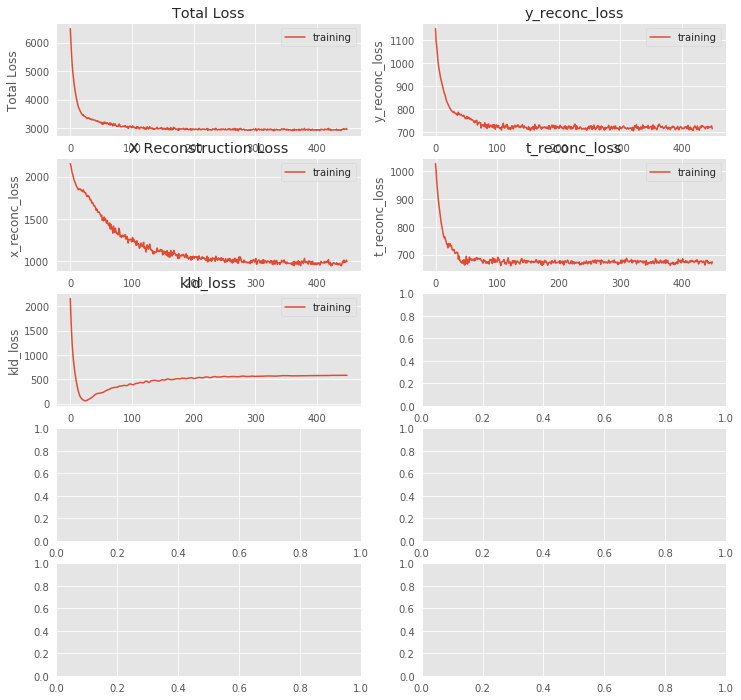

In [168]:
#Running the model
device = 'cpu'
model = run_cevae(num_epochs=450, lr_start=0.05, lr_end=0.001,
        train_loader=train_loader, test_loader=test_loader, input_dim=2,
        plot_curves=True, print_logs=True, device=device, z_dim=2, q_z_xty_nn=False, p_y_zt_nn=False,
        p_x_z_nn = False, p_t_z_nn = False, p_y_zt_std = False, p_x_z_std = False, p_t_z_std = False)

In [169]:
model.decoder.y_nn.weight

Parameter containing:
tensor([[-0.6133, -0.1499,  0.9055]], requires_grad=True)

In [116]:
print(model.decoder.x_nns[0].weight)
print(model.decoder.x_nns[1].weight)
print(model.decoder.t_nn.weight)
print(model.decoder.y_nn.weight)
print(torch.exp(model.decoder.x_log_std))
print(torch.exp(model.decoder.t_log_std))
print(torch.exp(model.decoder.y_log_std))

Parameter containing:
tensor([[1.0161, 0.0532]], requires_grad=True)
Parameter containing:
tensor([[2.0093, 0.0372]], requires_grad=True)
Parameter containing:
tensor([[ 0.5214, -0.3736]], requires_grad=True)
Parameter containing:
tensor([[ 0.6488, -0.2201,  0.9241]], requires_grad=True)
tensor([0.4891, 0.7391], grad_fn=<ExpBackward>)
tensor([0.9332], grad_fn=<ExpBackward>)
tensor([0.9753], grad_fn=<ExpBackward>)


Text(0.5, 1.0, 'P(t)')

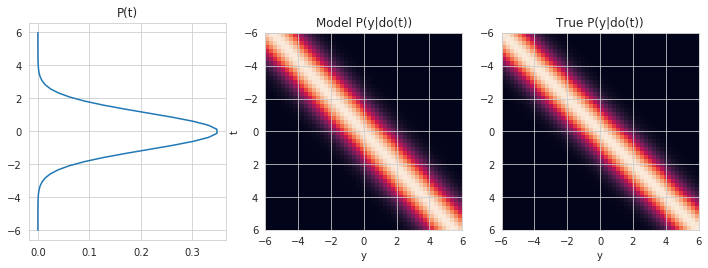

In [118]:
avg_causal_dist, py_dot_model, py_dot_true, y_range, t_range, pt_true = avg_causal_L1_dist_general(model=model, c_yt=c_yt, c_yz=c_yz, s_y=s_y, 
                                                                   c_t=c_t, s_t=s_t, c_x=c_x, p_y_zt_nn=True, z_dim=2,
                                                                  n=50)
fig, axes = plt.subplots(1,3, figsize=(12,4))
axes[1].imshow(py_dot_model, extent=(y_range[0], y_range[-1], t_range[-1],t_range[0]))
axes[2].imshow(py_dot_true, extent=(y_range[0], y_range[-1], t_range[-1],t_range[0]))
axes[1].set_xlabel("y")
axes[1].set_ylabel("t")
axes[2].set_xlabel("y")
axes[1].set_title("Model P(y|do(t))")
axes[2].set_title("True P(y|do(t))")
axes[0].plot(pt_true,t_range)
axes[0].set_title("P(t)")

In [170]:
cov = df.cov()
(cov.loc['t','y'] * cov.loc['x0','x1'] - cov.loc['y','x1'] * cov.loc['x0','t']) \
    / (cov.loc['t','t'] * cov.loc['x0','x1'] - cov.loc['x0','t'] * cov.loc['t','x1'])

0.9048016289647796

## Individual t,y binary model testing

In [622]:
c_x = np.array([1,2])
s_x = np.array([0.5,0.7])
t_a = np.array([50])#Make this larger to amplify amplify nonlinearities
t_b = np.array([0.5])
y_a0 = np.array([2])
y_b0 = np.array([-0.5])
y_a1 = np.array([2])
y_b1 = np.array([0.5])

In [623]:
sigmoid(t_a*0+t_b)

array([0.62245933])

In [624]:
p_y_zt1_true, p_y_zt0_true = p_y_zt_from_true_dist(y_a0, y_b0, y_a1, y_b1)
true_ate = linear_binary_ty_ate(p_y_zt1_true, p_y_zt0_true)
print("True ATE: {}".format(true_ate))

True ATE: 0.15048506347526708


In [625]:
BATCH_SIZE = 100
num_samples = 10000
df = linear_data_binary_ty_df(num_samples, c_x, s_x, t_a, t_b, y_a0, y_b0, y_a1, y_b1)
dataset = LinearDataset(df)
dataloader = LinearDataLoader(dataset, validation_split=0.0)
train_loader, test_loader = dataloader.get_loaders(batch_size=BATCH_SIZE)
#dummy test loader
test_loader, _ = LinearDataLoader(LinearDataset(df[:1]), validation_split=0.0).get_loaders(batch_size=1)

Training Results - Epoch 1 - y_reconc_loss: 43.8624 x_reconc_loss: 321.2677 t_reconc_loss: 43.8298 kld_loss: 43.9242 total_loss: 452.8841 learning rate: 0.0095
Training Results - Epoch 2 - y_reconc_loss: 40.7915 x_reconc_loss: 207.0283 t_reconc_loss: 28.7718 kld_loss: 112.6315 total_loss: 389.2231 learning rate: 0.0091
Training Results - Epoch 3 - y_reconc_loss: 40.5159 x_reconc_loss: 186.8893 t_reconc_loss: 24.1578 kld_loss: 126.6809 total_loss: 378.2440 learning rate: 0.0087
Training Results - Epoch 4 - y_reconc_loss: 39.2122 x_reconc_loss: 182.9458 t_reconc_loss: 24.0874 kld_loss: 130.8956 total_loss: 377.1410 learning rate: 0.0083
Training Results - Epoch 5 - y_reconc_loss: 38.7406 x_reconc_loss: 180.7580 t_reconc_loss: 20.0822 kld_loss: 137.7549 total_loss: 377.3357 learning rate: 0.0079
Training Results - Epoch 6 - y_reconc_loss: 39.9992 x_reconc_loss: 179.3196 t_reconc_loss: 23.4460 kld_loss: 130.2453 total_loss: 373.0100 learning rate: 0.0076
Training Results - Epoch 7 - y_reco

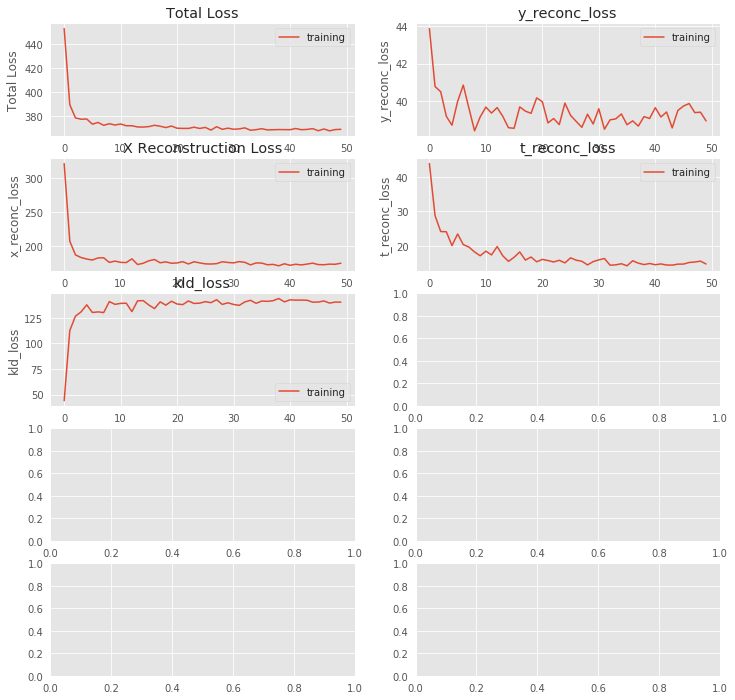

In [626]:
#Running the model
device = 'cpu'
p_y_zt_nn = False
model = run_cevae(num_epochs=50, lr_start=0.01, lr_end=0.001,
        train_loader=train_loader, test_loader=test_loader, input_dim=2,
        plot_curves=True, print_logs=True, device=device,
        binary_t_y=True, p_y_zt_nn=p_y_zt_nn, q_z_xty_nn=True)

In [627]:
print("x0 ", model.decoder.x_nns[0].weight)
print("x1 ",model.decoder.x_nns[1].weight)
print("t ",model.decoder.treatment_pred.weight, model.decoder.treatment_pred.bias)
print("y ",model.decoder.y0_nn.weight, model.decoder.y0_nn.bias,
      model.decoder.y1_nn.weight, model.decoder.y1_nn.bias)
print("x stds: ", torch.exp(model.decoder.x_log_std))
p_y_zt1_model, p_y_zt0_model = p_y_zt_from_model(model, p_y_zt_nn)
model_ate = linear_binary_ty_ate(p_y_zt1_model, p_y_zt0_model)
print("Model ATE: {}".format(model_ate))
linear_binary_ty_ate_2(p_y_zt1_model, p_y_zt0_model)

x0  Parameter containing:
tensor([[-0.9941]], requires_grad=True)
x1  Parameter containing:
tensor([[-1.9898]], requires_grad=True)
t  Parameter containing:
tensor([[-7.5166]], requires_grad=True) Parameter containing:
tensor([0.1836], requires_grad=True)
y  Parameter containing:
tensor([[-1.6250]], requires_grad=True) Parameter containing:
tensor([-0.7144], requires_grad=True) Parameter containing:
tensor([[-1.6894]], requires_grad=True) Parameter containing:
tensor([0.6142], requires_grad=True)
x stds:  tensor([0.4964, 0.6621], grad_fn=<ExpBackward>)
Model ATE: 0.22055167493800826


0.22055167444449486

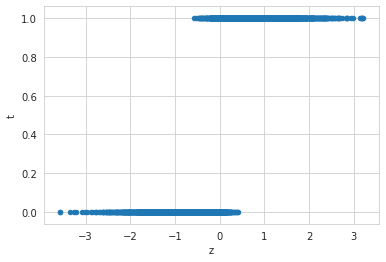

In [574]:
df.plot('z','t',kind='scatter')

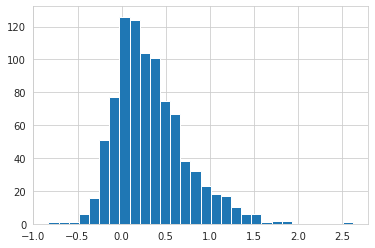

In [612]:
#P(z|t,y) visualization
df[(df.t == 1) & (df.y == 0)].z.hist(bins=30)

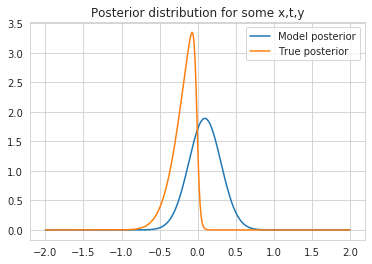

In [628]:
lim = 2
n = 300
z = np.linspace(-lim,lim,n)
x0=0
x1=0
mean = model.encoder.q_z_nn_t0y1_real(torch.Tensor([x0,x1]))[0].detach().numpy()
std = torch.exp(model.encoder.q_z_nn_t0y1_real(torch.Tensor([x0,x1]))[1]).detach().numpy()

def sigmoid(x):
    return 1/(1+np.exp(-x))
pz_xty = scipy.stats.norm.pdf(x0, loc=c_x[0]*z, scale=s_x[0]) \
        *scipy.stats.norm.pdf(x1, loc=c_x[1]*z, scale=s_x[1]) \
        *(1-sigmoid(t_a*z + t_b))*sigmoid(y_a0*z + y_b0) \
        *scipy.stats.norm.pdf(z)
pz_xty = pz_xty / (pz_xty.sum()*2*lim/n)

plt.figure()
plt.plot(z, scipy.stats.norm.pdf(z,loc=mean, scale=std))
plt.plot(z,pz_xty)
plt.legend(["Model posterior", "True posterior"])
plt.title("Posterior distribution for some x,t,y")
plt.show()

## Something else

In [348]:
z_mean, z_std, x_pred, t_pred, y_pred = model(X,t,y)

In [72]:
c_x = np.array([1,2])
s_x = np.array([0.5,0.7])
t_a = np.array([10])
t_b = np.array([0.5])
y_a0 = np.array([2])
y_b0 = np.array([-0.5])
y_a1 = np.array([2])
y_b1 = np.array([0.5])
num_samples = 1000000
df = linear_data_binary_ty_df(num_samples, c_x, s_x, t_a, t_b, y_a0, y_b0, y_a1, y_a0)

In [73]:
df

,z,x0,x1,t,y
0,0.915644,0.681552,1.115533,0.0,0.0
1,-1.712460,-2.677524,-4.370073,1.0,1.0
2,0.324937,0.509831,0.922870,0.0,0.0
3,1.101790,1.471415,0.389420,0.0,0.0
4,-0.988131,-1.290054,-0.713494,1.0,0.0
...,...,...,...,...,...
999995,0.530777,0.858386,0.643570,0.0,1.0
999996,0.895086,1.307019,0.914915,0.0,0.0
999997,-0.204620,-0.159130,-0.658198,1.0,1.0
999998,-0.218150,-0.480502,-1.084108,1.0,0.0


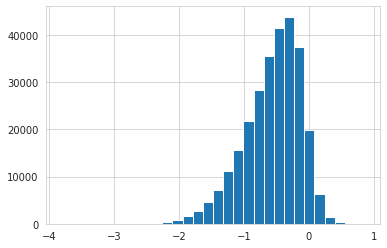

In [78]:
df[(df.t == 1) & (df.y == 0)].z.hist(bins=30)